<a href="https://colab.research.google.com/github/EUNYUGNYU/suicide_project/blob/main/suicide_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv("/content/drive/MyDrive/[2021-2] 기계학습 실습/suicide_data.csv")
df

ID  apt_t  sex  cfam  ...       N_K   N_VITC  LF_SAFE  LF_S2
0     A739211515      1    2     3  ...  2540.971   31.666       2      3 
1     A739211516      1    1     3  ...  2589.378   43.118       2      3 
2     A739211517      1    2     3  ...  2073.714  105.935       2      3 
3     A739219614      1    1     4  ...  1830.424   41.371       2      3 
4     A739219615      1    2     4  ...  6069.345   88.895       2      3 
...          ...    ...  ...   ...  ...       ...      ...      ...    ...
7375  P702300217      2    1     4  ...  5393.122   85.347       3      1 
7376  P702312314      2    2     2  ...  5115.446  332.436       1      3 
7377  P702322414      2    1     1  ...  2881.317   62.240       2      3 
7378  P702330414      2    1     1  ...  1686.216   18.751       2      1 
7379  P702336514      2    2     1  ...  1946.663   30.119       2      3 

[7380 rows x 89 columns]

## Feature 종류
#### 2015년 국민건강영양조사 기본 DB 중 89개의 특성과 7,380개의 데이터로
#### 자살 고위험군 선별 시스템을 설계합니다.

#### 각 속성의 데이터타입(dtype)은 object, int, float의 유형이 섞여 있습니다.
#### (특정 속성의 dtype이 'object'인 경우, 결측값이 NAN이 아닌 공백으로 처리되어 있어 이를 변환한 후, 결측값 처리를 진행해야 합니다.)

#### 각 속성에 대한 값 중 결측이 있는 경우도 있으며, '모름', 무응답으로 표기된 데이터가 존재합니다.
#### 모름, 무응답으로 표기된 데이터는 8 또는 9(속성에 따라 88 또는 99)로 나와 있어 해당 데이터 또한 결측으로 표기해야 합니다.
#### 해당 속성은 범수형 속성 중 cfam, BD1_11, BE8_1 입니다.


### numeric_feature
['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']

### categorical_feature
['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'LW_mt', 'LW_oc', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

### y_label
['mh_suicide']

### 각 속성에 대한 의미는 제일 하단의 이미지 참고

## 데이터 살펴보기 (결측률)

In [4]:
# 모름 또는 무응답으로 표기된 데이터를 결측값으로 대체합니다.

df = df.replace({'cfam':8, 'cfam':np.nan})
df = df.replace({'cfam':9, 'cfam':np.nan})
df = df.replace({'BD1_11':8, 'BD1_11':np.nan})
df = df.replace({'BD1_11':9, 'BD1_11':np.nan})
df = df.replace({'BE8_1':88, 'BE8_1':np.nan})
df = df.replace({'BE8_1':99, 'BE8_1':np.nan})

In [5]:
# 데이터 유형이 다른 속성들을 전부 numeric 속성으로 변환하여 결측을 찾습니다.

Counter(df.dtypes)

Counter({dtype('int64'): 10, dtype('float64'): 16, dtype('O'): 63})

In [6]:
df = df.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

In [7]:
# null 값이 있는 feature와 결측의 개수 출력하는 함수 

def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i])
            null_col.append(null.index[i])

In [8]:
null_check(df)

mh_stress 1445
L_OUT_FQ 750
mh_suicide 1445
BE8_1 476
LW_mt 3608
LW_oc 3608
HE_HP 2176
HE_anem 1555
O_chew_d 1976
L_BR_FQ 750
L_LN_FQ 750
L_DN_FQ 750
DI2_pr 476
DI3_pr 476
DI4_pr 921
DI5_pr 476
DI6_pr 476
DM1_pr 924
DM2_pr 476
DM3_pr 476
DM4_pr 476
D_8_2 476
D_8_4 476
DJ4_pr 476
DE1_pr 476
DE2_pr 476
DC1_pr 476
DC2_pr 476
DC3_pr 476
DC4_pr 476
DC5_pr 476
DC6_pr 476
DC7_pr 476
DF2_pr 476
DL1_pr 476
DJ8_pr 476
DH2_pr 476
DH3_pr 476
DN1_pr 476
DK8_pr 476
DK9_pr 476
DK4_pr 476
LQ4_00 476
LQ1_sb 476
LQ_1EQL 476
LQ_2EQL 476
LQ_3EQL 476
LQ_4EQL 476
LQ_5EQL 476
educ 476
EC1_1 476
BO1 476
BO1_1 476
BO2_1 476
BD1_11 476
incm 52
edu 968
occp 2025
HE_wt 409
HE_wc 413
HE_BMI 421
N_EN 752
N_WATER 752
N_PROT 752
N_FAT 752
N_SFA 752
N_MUFA 752
N_PUFA 752
N_CHOL 752
N_CHO 752
N_TDF 752
N_CA 752
N_FE 752
N_NA 752
N_K 752
N_VITC 752
LF_SAFE 427
LF_S2 427


#### y_label에 해당하는 'mh_scicide' 변수 결측의 경우, 임의로 채울 수 없는 부분이므로 결측을 포함하는 행을 삭제합니다.

In [9]:
df1 = df.dropna(subset=['mh_suicide'])

In [10]:
df1

apt_t  sex  cfam  allownc  ...       N_K   N_VITC  LF_SAFE  LF_S2
0         1    2     3       20  ...  2540.971   31.666      2.0    3.0
1         1    1     3       20  ...  2589.378   43.118      2.0    3.0
3         1    1     4       20  ...  1830.424   41.371      2.0    3.0
4         1    2     4       20  ...  6069.345   88.895      2.0    3.0
7         1    2     1       20  ...  2331.930  224.503      1.0    3.0
...     ...  ...   ...      ...  ...       ...      ...      ...    ...
7375      2    1     4       10  ...  5393.122   85.347      3.0    1.0
7376      2    2     2       20  ...  5115.446  332.436      1.0    3.0
7377      2    1     1       20  ...  2881.317   62.240      2.0    3.0
7378      2    1     1       10  ...  1686.216   18.751      2.0    1.0
7379      2    2     1       10  ...  1946.663   30.119      2.0    3.0

[5935 rows x 88 columns]

In [11]:
# 다시 결측 확인 
null_check(df1)

mh_stress 1
L_OUT_FQ 643
LW_mt 2640
LW_oc 2640
HE_HP 845
HE_anem 411
O_chew_d 531
L_BR_FQ 643
L_LN_FQ 643
L_DN_FQ 643
DI4_pr 365
DM1_pr 365
incm 36
edu 398
occp 652
HE_wt 5
HE_wc 7
HE_BMI 9
N_EN 645
N_WATER 645
N_PROT 645
N_FAT 645
N_SFA 645
N_MUFA 645
N_PUFA 645
N_CHOL 645
N_CHO 645
N_TDF 645
N_CA 645
N_FE 645
N_NA 645
N_K 645
N_VITC 645
LF_SAFE 354
LF_S2 354


#### 결측률이 10%를 훨씬 뛰어넘는 변수 LW_mt, LW_oc 삭제 

In [12]:
df2 = df1.drop(['LW_mt','LW_oc'],axis='columns',inplace=False)

In [13]:
df2

apt_t  sex  cfam  allownc  ...       N_K   N_VITC  LF_SAFE  LF_S2
0         1    2     3       20  ...  2540.971   31.666      2.0    3.0
1         1    1     3       20  ...  2589.378   43.118      2.0    3.0
3         1    1     4       20  ...  1830.424   41.371      2.0    3.0
4         1    2     4       20  ...  6069.345   88.895      2.0    3.0
7         1    2     1       20  ...  2331.930  224.503      1.0    3.0
...     ...  ...   ...      ...  ...       ...      ...      ...    ...
7375      2    1     4       10  ...  5393.122   85.347      3.0    1.0
7376      2    2     2       20  ...  5115.446  332.436      1.0    3.0
7377      2    1     1       20  ...  2881.317   62.240      2.0    3.0
7378      2    1     1       10  ...  1686.216   18.751      2.0    1.0
7379      2    2     1       10  ...  1946.663   30.119      2.0    3.0

[5935 rows x 86 columns]

In [14]:
df2.describe()

apt_t          sex  ...      LF_SAFE        LF_S2
count  5935.000000  5935.000000  ...  5581.000000  5581.000000
mean      1.507161     1.555181  ...     1.571045     2.935316
std       0.499991     0.496988  ...     0.627489     0.276839
min       1.000000     1.000000  ...     1.000000     1.000000
25%       1.000000     1.000000  ...     1.000000     3.000000
50%       2.000000     2.000000  ...     2.000000     3.000000
75%       2.000000     2.000000  ...     2.000000     3.000000
max       2.000000     2.000000  ...     4.000000     4.000000

[8 rows x 86 columns]

In [15]:
Counter(df2['mh_suicide'])

Counter({0.0: 5611, 1.0: 324})

## 데이터 전처리

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [17]:
def pipeline(df, nums, cats):
    
    num_inputer = SimpleImputer(strategy='median')
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("impute", num_inputer),
        ("scaler", StandardScaler())])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats)),
        ("impute", cat_imputer)])
        #("encoder", OneHotEncoder())])
    
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=preprocess_pipeline.fit_transform(df)
    
    return X

In [18]:
nums = ['incm', 'edu', 'occp', 'marri_1', 'HE_wt', 'HE_wc', 'HE_BMI', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_CA', 'N_FE', 'N_NA', 'N_K', 'N_VITC', 'LF_SAFE', 'LF_S2']
cats = ['apt_t', 'sex', 'cfam', 'allownc', 'house', 'live_t', 'marri_2', 'tins', 'npins', 'DI2_pr', 'DI3_pr', 'DI4_pr', 'DI5_pr', 'DI6_pr', 'DM1_pr', 'DM2_pr', 'DM3_pr', 'DM4_pr', 'D_8_2', 'D_8_4', 'DJ4_pr', 'DE1_pr', 'DE2_pr', 'DC1_pr', 'DC2_pr', 'DC3_pr', 'DC4_pr', 'DC5_pr', 'DC6_pr', 'DC7_pr', 'DF2_pr', 'DL1_pr', 'DJ8_pr', 'DH2_pr', 'DH3_pr', 'DN1_pr', 'DK8_pr', 'DK9_pr', 'DK4_pr', 'LQ4_00', 'LQ1_sb', 'LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL', 'educ', 'EC1_1', 'BO1', 'BO1_1', 'BO2_1', 'BD1_11', 'mh_stress', 'BE8_1', 'HE_HP', 'HE_anem', 'O_chew_d', 'L_BR_FQ', 'L_LN_FQ', 'L_DN_FQ']

In [19]:
X_data = pipeline(df2,nums,cats)

# 범주형 속성을 원-핫 인코딩을 실행하면서 희소행렬 형태로 output이 출력됩니다.

In [20]:
print(X_data[0])

[ 1.33461886  1.19595444  0.9107949  -0.55769414 -0.89474376 -1.14094498
 -1.1124932  -0.19056819 -0.31768139 -0.06876745  0.77560927  0.94687247
  0.64277695  0.75473869 -0.08301399 -0.77714016 -0.84367245 -0.05026585
 -0.67468949 -0.51783973 -0.28655553 -0.59851344  0.65391279  0.22622831
  1.          2.          3.         20.          2.          3.
  1.         10.          1.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          8.          8.          8.
  8.          8.          8.          2.          2.          1.
  1.          1.          1.          1.          6.          2.
  3.          1.          2.          4.          0.          5.
  2.          0.          0.          4.          1.          1.        ]


In [21]:
y_label = df2['mh_suicide']

### Min-Max normalization

descirbe 할 때 변수의 range가 매우 다양한 것이 확인된다. 따라서, 데이터를 모두 min-max 정규화를 해주었다.

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

# x에 대해 최대최소 정규화 실시

scaler = MinMaxScaler()
scaler.fit(X_data)

X_scaled = scaler.transform(X_data)

In [23]:
# 정규화 후, 데이터 셋 속성 출력

print('정규화 전 특성별 최소값 : \n', X_data.min(axis=0))
print('정규화 전 특성별 최소값 : \n', X_data.max(axis=0))

print('정규화 후 특성별 최소값 : \n', X_scaled.min(axis=0))
print('정규화 후 특성별 최소값 : \n', X_scaled.max(axis=0))

정규화 전 특성별 최소값 : 
 [-1.36785911 -1.47916727 -1.85231691 -0.55769414 -2.70982143 -2.78298408
 -3.0232039  -2.11159915 -1.65123067 -1.40014659 -1.21404853 -1.12558981
 -1.08690203 -1.02517093 -0.90771917 -2.41759638 -1.80577992 -1.61187575
 -1.50793897 -1.17492701 -1.87126666 -0.87528797 -0.96721186 -7.21235919
  1.          1.          1.         10.          1.          1.
  1.         10.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          1.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.
  1.          0.          0.          1.          1.          1.        ]
정규화 전 특성별 최소값 : 
 [ 1.33461886 

#### 데이터 나누기

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
np.random.seed(3)
tf.random.set_seed(3)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_label, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_test)
y_val = np.asarray(y_test)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [26]:
print('Train data shape: {0}'.format(X_train.shape))
print('Validation data shape: {0}'.format(X_val.shape))
print('Test data shape: {0}'.format(X_test.shape))

print('Train data label => %s' %Counter(y_train))
print('Validation data label => %s' %Counter(y_val))
print('Test data label => %s' %Counter(y_test))

Train data shape: (3561, 84)
Validation data shape: (1187, 84)
Test data shape: (1187, 84)
Train data label => Counter({0.0: 3369, 1.0: 192})
Validation data label => Counter({0.0: 1117, 1.0: 70})
Test data label => Counter({0.0: 1117, 1.0: 70})


# 딥러닝 모델 제작

이제부터 딥러닝 모델을 만들고 그 후에 성능향상을 위해 스케일링 히겠다.

그런데, 처음 네트워크 구조를 설계할 때 히든 레이어의 개수와 히든 레이어 내 노드의 개수를 지정해야 한다. (초모수 튜닝) 일단 이용자가 여러개 지정해서 가장 괜찮을 것을 선택하도록 하겠다.

그 전에 초기 모델 지정시 선행 연구를 활용하겠다. 

"대부분의 문제에 대해서, 두 가지 규칙을 사용하는 hidden layer 설정을 사용하여 hidden layer 한 개가 아마도 괜찮은 성능을 얻을 수 있다. (심지어 두 번째 최적화 단계없이도)

두 개의 규칙은 
1) hidden layer의 개수는 1개이다.
2) 그 layer에 있는 neuron들의 개수는 input과 output layer들 사이에 있는 neuron들의 중간이다."

정말 그런지 확인해보겠다.

### 1) 히든 레이어 수 지정

먼저 딥러닝 구조의 히든 레이어의 수를 지정하겠다.

같은 조건에서 비교를 해야 하니 히든레이어의 히든 노드는 84개 이다. 그리고 히든레이어의 활성화 함수로 relu 함수를 사용한다. 

또한 컴파일 시 RMSprop 를 사용한다.

#### 히든레이어 1층

In [27]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta,Adamax,Nadam
import matplotlib.pyplot as plt

In [28]:
# 히든 레이어 1층
np.random.seed(3)
tf.random.set_seed(3)

model_h1 = models.Sequential()
model_h1.add(Dense(84, input_dim = 84, activation='relu'))
model_h1.add(Dense(1, activation='sigmoid'))

model_h1.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

에폭: 일단 1000으로 잡는다. 아직 early stopping을 적용하지 않는다.

배치사이즈: 배치사이즈는 과적합하고는 관련이 없다. 이 값이 작을 수록 수렴속도는 느리지만 local minimum에 빠질 가능성은 줄어든다. 반면 배치사이즈가 클 수록 학습진행속도와 수렴속도가 빨라지지만 항상 빨리 수렴하는 것은 아니다. 작은 데이터셋이라면 32가 적당하다는 의견이 많으니 32로 지정하였다.

In [29]:
hist_h1 = model_h1.fit(X_train, y_train,
                 epochs = 1000, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/1000
112/112 [==============================] - 1s 4ms/step - loss: 0.2081 - accuracy: 0.9458 - val_loss: 0.2163 - val_accuracy: 0.9410
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9461 - val_loss: 0.1964 - val_accuracy: 0.9410
Epoch 3/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9458 - val_loss: 0.1960 - val_accuracy: 0.9410
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9461 - val_loss: 0.1934 - val_accuracy: 0.9410
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9469 - val_loss: 0.1920 - val_accuracy: 0.9427
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9475 - val_loss: 0.2090 - val_accuracy: 0.9410
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9466 - val_loss: 0.2079 - val_accuracy:

In [30]:
# loss와 accuracy 확인 그래프를 그리는 함수 정의
def draw_loss(hist):
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

  acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuracy')

  loss_ax.legend(loc = 'upper left')
  acc_ax.legend(loc = 'lower left')

  plt.show()

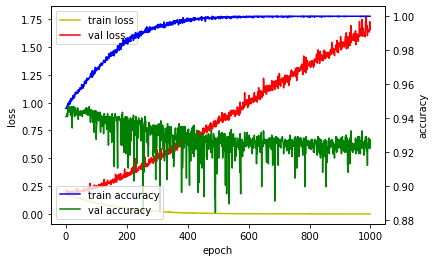

In [31]:
# 모델 학습과정 확인
draw_loss(hist_h1)

이번에는 히든레이어 층을 하나 더 쌓았다.(히든노드수는 일단 84)

#### 히든레이어 2층

In [32]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든레이어 2층
model_h2 = models.Sequential()
model_h2.add(Dense(84, input_dim = 84, activation='relu'))
model_h2.add(Dense(84, activation='relu'))
model_h2.add(Dense(1, activation='sigmoid'))

model_h2.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
hist_h2 = model_h2.fit(X_train, y_train,
                 epochs = 1000, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/1000
112/112 [==============================] - 1s 4ms/step - loss: 0.2048 - accuracy: 0.9436 - val_loss: 0.2205 - val_accuracy: 0.9410
Epoch 2/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1807 - accuracy: 0.9464 - val_loss: 0.1893 - val_accuracy: 0.9419
Epoch 3/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.9475 - val_loss: 0.2095 - val_accuracy: 0.9410
Epoch 4/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1701 - accuracy: 0.9475 - val_loss: 0.1997 - val_accuracy: 0.9419
Epoch 5/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9466 - val_loss: 0.1955 - val_accuracy: 0.9444
Epoch 6/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9506 - val_loss: 0.2274 - val_accuracy: 0.9419
Epoch 7/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9492 - val_loss: 0.2290 - val_accuracy:

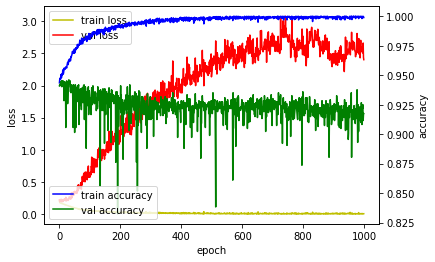

In [34]:
# 모델 학습과정 확인
draw_loss(hist_h2)

#### 히든레이어 3층

In [35]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든레이어 3층
model_h3 = models.Sequential()
model_h3.add(Dense(84, input_dim = 84, activation='relu'))
model_h3.add(Dense(84, activation='relu'))
model_h3.add(Dense(84, activation='relu'))
model_h3.add(Dense(1, activation='sigmoid'))

model_h3.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
hist_h3 = model_h3.fit(X_train, y_train,
                 epochs = 1000, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/1000
112/112 [==============================] - 1s 4ms/step - loss: 0.2085 - accuracy: 0.9377 - val_loss: 0.2259 - val_accuracy: 0.9410
Epoch 2/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1808 - accuracy: 0.9461 - val_loss: 0.1903 - val_accuracy: 0.9410
Epoch 3/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9466 - val_loss: 0.2128 - val_accuracy: 0.9410
Epoch 4/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9475 - val_loss: 0.2012 - val_accuracy: 0.9419
Epoch 5/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1680 - accuracy: 0.9475 - val_loss: 0.2007 - val_accuracy: 0.9444
Epoch 6/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9506 - val_loss: 0.2336 - val_accuracy: 0.9427
Epoch 7/1000
112/112 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9492 - val_loss: 0.2371 - val_accuracy:

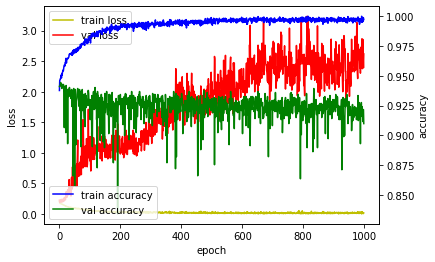

In [ ]:
# 모델 학습과정 확인
draw_loss(hist_h3)

우선 각 모델을 비교했을 때 1000번을 학습할 경우 과적합이 발생한 것이 확인된다.

최종 모델의 성능은 AUC 로 선정할 것이지만 일단 초기 모델을 세팅하기 위해 각 모델별 accuracy와 loss를 확인해서 히든레이어 수를 정하겠다.

#### 결과 비교

In [ ]:
# 결과 비교

loss_and_metrics_h1 = model_h1.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_h2 = model_h2.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_h3 = model_h3.evaluate(X_test,y_test,batch_size=32)

print('\n##### hidden layer 1 - Test Result #####')
print('loss : ',str(loss_and_metrics_h1[0]))
print('Accuracy : ',str(loss_and_metrics_h1[1]))
print('\n##### hidden layer 2 - Test Result #####')
print('loss : ',str(loss_and_metrics_h2[0]))
print('Accuracy : ',str(loss_and_metrics_h2[1]))
print('\n##### hidden layer 3 - Test Result #####')
print('loss : ',str(loss_and_metrics_h3[0]))
print('Accuracy : ',str(loss_and_metrics_h3[1]))

38/38 [==============================] - 0s 1ms/step - loss: 2.6181 - accuracy: 0.9099

##### hidden layer 1 - Test Result #####
loss :  1.656633734703064
Accuracy :  0.9224936962127686

##### hidden layer 2 - Test Result #####
loss :  2.402639865875244
Accuracy :  0.9174389243125916

##### hidden layer 3 - Test Result #####
loss :  2.618053674697876
Accuracy :  0.9098567962646484


여기까지 확인한 결과 히든노드의 개수를 84로 통일 했을 때 히든레이어가 1개일 때 성능이 가장 좋은 것으로 나온다. (3개로 잡을 경우 TR에서의 성능 (loss, accuracy 기준) 은 거의 100% 지만 TS의 성능은 나빠진다.)

**=> 따라서, 히든레이어는 1층을 쌓기로 한다. (대부분의 딥러닝은 히든레이어를 한 층만 쌓아도 된다는 선행 연구와 동일한 결과가 나왔다.)**

### 2) 히든노드 수 지정

이번에는 히든레이어가 1층일 때 히든노드를 몇개로 잡아야 할 지 확인해보겠다.

노드수는 input data의 0.25배~1.75배까지로 정하였다. (노드수 지정에 대한 특별한 연구 결과가 없다.)

또한, 에폭도 1000은 너무 많다 판단, 과젇합을 막기 위해 기존 그래프를 기반으로 해서 300으로 수정하였다. (아직 early_stopping 미적용)

#### 히든 노드수 28개

In [97]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든 노드 수 28개
model_n28 = models.Sequential()
model_n28 .add(Dense(28, input_dim = 84, activation='relu'))
model_n28 .add(Dense(1, activation='sigmoid'))

model_n28 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
hist_n28 = model_n28.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.2085 - accuracy: 0.9461 - val_loss: 0.2164 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9461 - val_loss: 0.2017 - val_accuracy: 0.9410
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9461 - val_loss: 0.1966 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9458 - val_loss: 0.1939 - val_accuracy: 0.9410
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9458 - val_loss: 0.1923 - val_accuracy: 0.9427
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9469 - val_loss: 0.1994 - val_accuracy: 0.9427
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9466 - val_loss: 0.2012 - val_accuracy: 0.9427

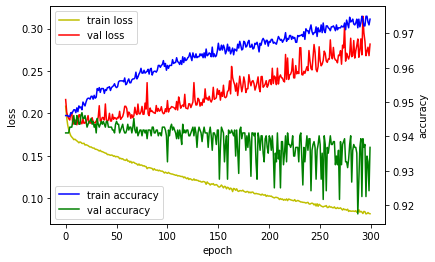

In [99]:
# 모델 학습과정 확인
draw_loss(hist_n28)

#### 히든노드수 42개

In [100]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 42개
model_n42 = models.Sequential()
model_n42 .add(Dense(42, input_dim = 84, activation='relu'))
model_n42 .add(Dense(1, activation='sigmoid'))

model_n42 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
hist_n42 = model_n42.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 4ms/step - loss: 0.2313 - accuracy: 0.9416 - val_loss: 0.2291 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9461 - val_loss: 0.2095 - val_accuracy: 0.9410
Epoch 3/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9461 - val_loss: 0.2026 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9461 - val_loss: 0.1992 - val_accuracy: 0.9410
Epoch 5/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1766 - accuracy: 0.9461 - val_loss: 0.1955 - val_accuracy: 0.9419
Epoch 6/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9469 - val_loss: 0.2080 - val_accuracy: 0.9419
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.9472 - val_loss: 0.2059 - val_accuracy: 0.9419

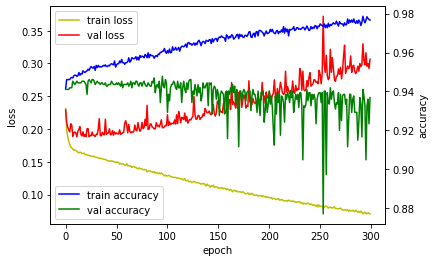

In [102]:
# 모델 학습과정 확인
draw_loss(hist_n42)

#### 히든노드수 63개

In [103]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 63개
model_n63 = models.Sequential()
model_n63 .add(Dense(63, input_dim = 84, activation='relu'))
model_n63 .add(Dense(1, activation='sigmoid'))

model_n63 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
hist_n63 = model_n63.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.2329 - accuracy: 0.9301 - val_loss: 0.2156 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9461 - val_loss: 0.1960 - val_accuracy: 0.9410
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9458 - val_loss: 0.1931 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9461 - val_loss: 0.1911 - val_accuracy: 0.9410
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9464 - val_loss: 0.1898 - val_accuracy: 0.9436
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.9475 - val_loss: 0.2041 - val_accuracy: 0.9410
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9466 - val_loss: 0.2047 - val_accuracy: 0.9410

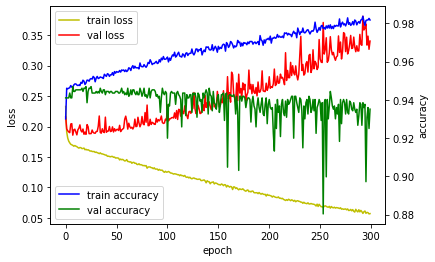

In [105]:
# 모델 학습과정 확인
draw_loss(hist_n63)

#### 히든노드수 84개

In [106]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 84개
model_n84 = models.Sequential()
model_n84 .add(Dense(84, input_dim = 84, activation='relu'))
model_n84 .add(Dense(1, activation='sigmoid'))

model_n84 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
hist_n84 = model_n84.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 6ms/step - loss: 0.2081 - accuracy: 0.9458 - val_loss: 0.2163 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.9461 - val_loss: 0.1964 - val_accuracy: 0.9410
Epoch 3/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9458 - val_loss: 0.1960 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.9461 - val_loss: 0.1934 - val_accuracy: 0.9410
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9469 - val_loss: 0.1920 - val_accuracy: 0.9427
Epoch 6/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9475 - val_loss: 0.2090 - val_accuracy: 0.9410
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9466 - val_loss: 0.2079 - val_accuracy: 0.9410

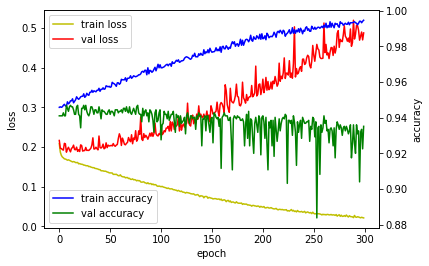

In [108]:
# 모델 학습과정 확인
draw_loss(hist_n84)

#### 히든노드수 105개

In [109]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 105개
model_n105 = models.Sequential()
model_n105 .add(Dense(105, input_dim = 84, activation='relu'))
model_n105 .add(Dense(1, activation='sigmoid'))

model_n105 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [110]:
hist_n105 = model_n105.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 4ms/step - loss: 0.2127 - accuracy: 0.9379 - val_loss: 0.2153 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9461 - val_loss: 0.1907 - val_accuracy: 0.9410
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9466 - val_loss: 0.1969 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.9472 - val_loss: 0.1923 - val_accuracy: 0.9419
Epoch 5/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9458 - val_loss: 0.1906 - val_accuracy: 0.9444
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9486 - val_loss: 0.2140 - val_accuracy: 0.9419
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.9466 - val_loss: 0.2106 - val_accuracy: 0.9419

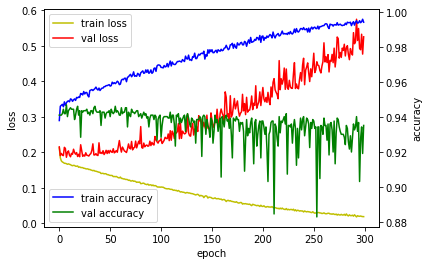

In [111]:
# 모델 학습과정 확인
draw_loss(hist_n105)

#### 히든노드수 126개

In [112]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 126개
model_n126 = models.Sequential()
model_n126 .add(Dense(126, input_dim = 84, activation='relu'))
model_n126 .add(Dense(1, activation='sigmoid'))

model_n126 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
hist_n126 = model_n126.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.2036 - accuracy: 0.9452 - val_loss: 0.2144 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.9461 - val_loss: 0.1904 - val_accuracy: 0.9419
Epoch 3/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9461 - val_loss: 0.1983 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9469 - val_loss: 0.1935 - val_accuracy: 0.9427
Epoch 5/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1710 - accuracy: 0.9475 - val_loss: 0.1918 - val_accuracy: 0.9436
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9486 - val_loss: 0.2156 - val_accuracy: 0.9427
Epoch 7/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.9469 - val_loss: 0.2138 - val_accuracy: 0.9427

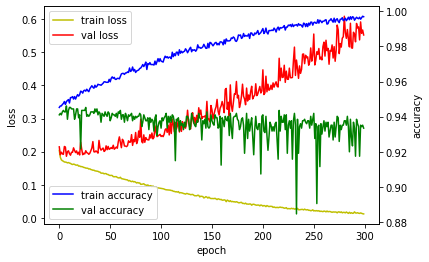

In [114]:
# 모델 학습과정 확인
draw_loss(hist_n126)

#### 히든노드수 147개

In [115]:
np.random.seed(3)
tf.random.set_seed(3)

# 히든노드수 147개
model_n147 = models.Sequential()
model_n147 .add(Dense(147, input_dim = 84, activation='relu'))
model_n147 .add(Dense(1, activation='sigmoid'))

model_n147 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [116]:
hist_n147 = model_n147.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 3ms/step - loss: 0.2015 - accuracy: 0.9455 - val_loss: 0.2137 - val_accuracy: 0.9410
Epoch 2/300
112/112 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.9461 - val_loss: 0.1885 - val_accuracy: 0.9419
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9466 - val_loss: 0.2019 - val_accuracy: 0.9410
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.9472 - val_loss: 0.1952 - val_accuracy: 0.9427
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1705 - accuracy: 0.9461 - val_loss: 0.1928 - val_accuracy: 0.9436
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9495 - val_loss: 0.2201 - val_accuracy: 0.9410
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9464 - val_loss: 0.2165 - val_accuracy: 0.9410

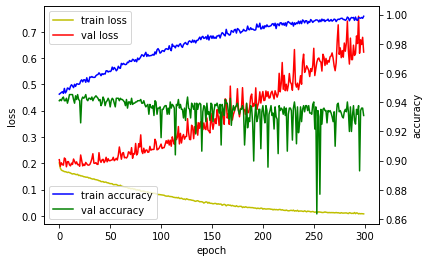

In [117]:
# 모델 학습과정 확인
draw_loss(hist_n147)

최종 성능을 accuracy 로 평가할 것은 아니지만 일단 노드수 지정을 위해 해당 모델의 loss와 accuracy 를 확인하였다.

#### 결과 비교

In [118]:
# 결과 비교

loss_and_metrics_n28 = model_n28.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n42 = model_n42.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n63 = model_n63.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n84 = model_n84.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n105 = model_n105.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n126 = model_n126.evaluate(X_test,y_test,batch_size=32)
loss_and_metrics_n147 = model_n147.evaluate(X_test,y_test,batch_size=32)

print('\n##### node28 - Test Result #####')
print('loss : ',str(loss_and_metrics_n28[0]))
print('Accuracy : ',str(loss_and_metrics_n28[1]))
print('\n##### node42  - Test Result #####')
print('loss : ',str(loss_and_metrics_n42[0]))
print('Accuracy : ',str(loss_and_metrics_n42[1]))
print('\n##### node63 - Test Result #####')
print('loss : ',str(loss_and_metrics_n63[0]))
print('Accuracy : ',str(loss_and_metrics_n63[1]))
print('\n##### node84 - Test Result #####')
print('loss : ',str(loss_and_metrics_n84[0]))
print('Accuracy : ',str(loss_and_metrics_n84[1]))
print('\n##### node105  - Test Result #####')
print('loss : ',str(loss_and_metrics_n105[0]))
print('Accuracy : ',str(loss_and_metrics_n105[1]))
print('\n##### node126 - Test Result #####')
print('loss : ',str(loss_and_metrics_n126[0]))
print('Accuracy : ',str(loss_and_metrics_n126[1]))
print('\n##### node147 - Test Result #####')
print('loss : ',str(loss_and_metrics_n147[0]))
print('Accuracy : ',str(loss_and_metrics_n147[1]))

38/38 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.9309

##### node28 - Test Result #####
loss :  0.2817246615886688
Accuracy :  0.9368155002593994

##### node42  - Test Result #####
loss :  0.30641406774520874
Accuracy :  0.9368155002593994

##### node63 - Test Result #####
loss :  0.3402518928050995
Accuracy :  0.9351305961608887

##### node84 - Test Result #####
loss :  0.4873601198196411
Accuracy :  0.9351305961608887

##### node105  - Test Result #####
loss :  0.5255591869354248
Accuracy :  0.9351305961608887

##### node126 - Test Result #####
loss :  0.5527308583259583
Accuracy :  0.9334456324577332

##### node147 - Test Result #####
loss :  0.6226102709770203
Accuracy :  0.930918276309967


여기까지 진행한 결과 히든 노드의 수가 42개인 것의 성능이 가장 좋은 것이 확인된다. 

오차도 적고 정확도도 괜찮은데다 학습을 반복할수록 성능의 변화도 가장 적은 편이기 때문이다. (n28은 너무 그래프가 불안정하다.)

따라서 히든레이어의 노드수는 42로 한다.


**=> 따라서 그냥 히든레이어 노드수는 42으로 한다. (대부분 히든레이어의 노드수는 input 데이터 수보다 적다는 선행연구 결과와 일치하는 결과가 나왔다.)**


**초기 딥러닝 모델 : model_n42 (하든레이어 1층, 히든 노드수 42개)**

초기 딥러닝 모델을 선택했으면 accuracy가 아닌 recall 을 확인해보겠다. 


recall 은 찾고자 하는 것을 (1: 자살 위험군) 얼마나 잘 찾는지에 관한 것이다.

In [40]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
predict_1 = model_n42.predict(X_test)
print("Recall :", recall_score(y_test,predict_1.round()))

Recall : 0.11428571428571428


In [42]:
print(classification_report(y_test,predict_1.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.38      0.11      0.18        70

    accuracy                           0.94      1187
   macro avg       0.66      0.55      0.57      1187
weighted avg       0.91      0.94      0.92      1187



In [43]:
import matplotlib as mpl
from sklearn import metrics

# ROC curve를 그리는 함수 정의
def draw_roccurve(predict):
  fpr, tpr, thresholds = metrics.roc_curve(y_test, predict) #곡선 그리기

  plt.plot(fpr, tpr)
  plt.fill_between(fpr, tpr, color='y')
  plt.plot([0, 1], [0, 1], '--')
  plt.xlabel('False Positive Rate(1 - Specificity)')
  plt.ylabel('True Positive Rate(Sensitivity)')

  score = metrics.auc(fpr, tpr) #면적 구하기
  print(score) #1.0

  plt.title('ROC (Receiver Operating Characteristic) Curve (AUC = {})'.format(round(score,4)))
  plt.show()

0.7070661209873386


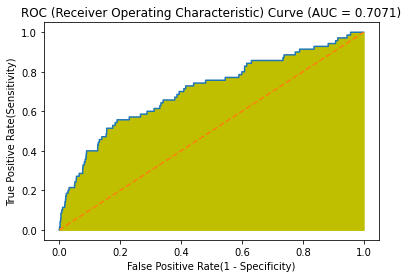

In [44]:
draw_roccurve(predict_1)

확인결과 accuracy는 0.937로 높은 편이지만 recall 은 0.7071 이다.

# 모델 튜닝

모델의 성능을 향상시키기 위해 튜닝하도록 하겠다.

### 1) early stopping

model_n42 모델은 300번 학습했다. 그런데 300번 학습하는 것 보다 훨씬 더 앞에서 TS의 loss값이 감소하다가 증가하는 것이 확인된다. 

따라서 과적합을 방지하기 위해 만든 모델에 early stopping을 적용하였다. patient 는 일단 50을 적용하였다.

##### patience = 50

In [144]:
np.random.seed(3)
tf.random.set_seed(3)

# early stopping 적용모델
model_early = models.Sequential()
model_early .add(Dense(42, input_dim = 84, activation='relu'))
model_early .add(Dense(1, activation='sigmoid'))

model_early .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [145]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os

# 모델 최적화 설정. 50개 대기 후 stop 한다.
MODEL_DIR = './DNN/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./DNN/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

In [146]:
from keras.callbacks import EarlyStopping 

hist_early =model_early.fit( X_train,y_train,epochs=300,batch_size=32,
                            validation_data = (X_val, y_val),verbose=0, 
                            callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.22906, saving model to ./DNN/01-0.2291.hdf5

Epoch 00002: val_loss improved from 0.22906 to 0.20946, saving model to ./DNN/02-0.2095.hdf5

Epoch 00003: val_loss improved from 0.20946 to 0.20265, saving model to ./DNN/03-0.2026.hdf5

Epoch 00004: val_loss improved from 0.20265 to 0.19919, saving model to ./DNN/04-0.1992.hdf5

Epoch 00005: val_loss improved from 0.19919 to 0.19554, saving model to ./DNN/05-0.1955.hdf5

Epoch 00006: val_loss did not improve from 0.19554

Epoch 00007: val_loss did not improve from 0.19554

Epoch 00008: val_loss improved from 0.19554 to 0.18876, saving model to ./DNN/08-0.1888.hdf5

Epoch 00009: val_loss did not improve from 0.18876

Epoch 00010: val_loss did not improve from 0.18876

Epoch 00011: val_loss did not improve from 0.18876

Epoch 00012: val_loss improved from 0.18876 to 0.18805, saving model to ./DNN/12-0.1881.hdf5

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not imp

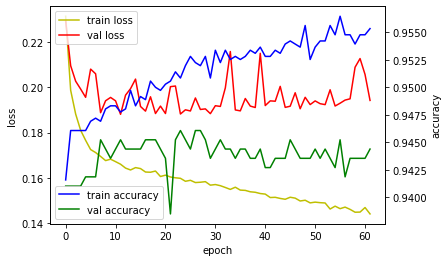

In [147]:
# 모델 학습과정 확인
draw_loss(hist_early)

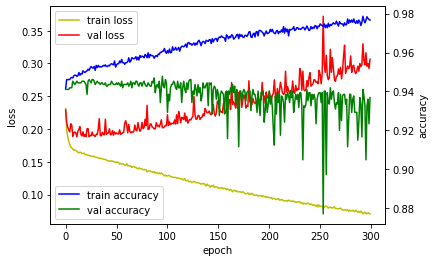

In [148]:
# 기존과 비교
draw_loss(hist_n42)

오버피팅 현상을 다소 사라졌다. 하지만 그래프가 들쑥날쑥해서 불안정한 것으로 확인된다.

In [149]:
loss_and_metrics_early = model_early.evaluate(X_test,y_test,batch_size=32)

print('##### early stopping - Test Result #####')
print('loss : ',str(loss_and_metrics_early[0]))
print('Accuracy : ',str(loss_and_metrics_early[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9444
##### early stopping - Test Result #####
loss :  0.19416993856430054
Accuracy :  0.9443976283073425


In [150]:
predict_2 = model_early.predict(X_test)
print("Recall :", recall_score(y_test,predict_2.round()))

Recall : 0.17142857142857143


In [151]:
print(classification_report(y_test,predict_2.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.60      0.17      0.27        70

    accuracy                           0.94      1187
   macro avg       0.78      0.58      0.62      1187
weighted avg       0.93      0.94      0.93      1187



0.7755339557488171


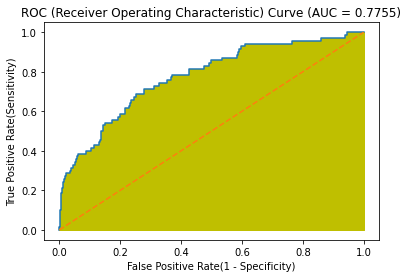

In [152]:
draw_roccurve(predict_2)

0.7070661209873386


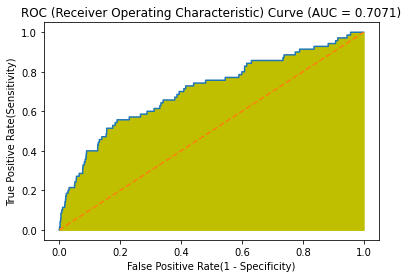

In [153]:
# 기존과 비교
draw_roccurve(predict_1)

early_stopping = 50을 적용한 결과 AUC가 많이 향상되었다.

##### patience = 30

이번에는 patience를 30으로 조정하였다.

In [154]:
# patience=30인 early_stopping

np.random.seed(3)
tf.random.set_seed(3)

# early stopping 적용모델
model_early2 = models.Sequential()
model_early2  .add(Dense(42, input_dim = 84, activation='relu'))
model_early2 .add(Dense(1, activation='sigmoid'))

model_early2 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [155]:
early_stopping_callback2 = EarlyStopping(monitor='val_loss', patience=30)

hist_early2 = model_early2.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback2,checkpointer])


Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss did not improve from 0.18805

Epoch 00011: val_loss did not improve from 0.18805

Epoch 00012: val_loss did not improve from 0.18805

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not improve from 0.18805

Epoch 00015: val_loss did not improve from 0.18805

Epoch 00016: val_loss did not improve from 0.18805

Epoch 00017: val_loss did not improve from 0.18805

Epoch 00018: val_loss did not improve from 0.18805

Epoch 00019: val_loss did not improve from 0.18805

Epoch 00020

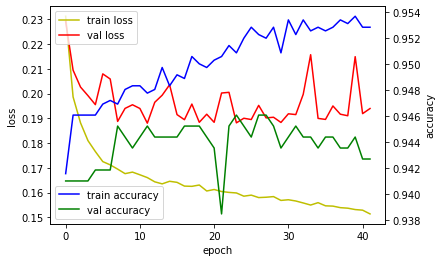

In [156]:
# 모델 학습과정 확인
draw_loss(hist_early2)

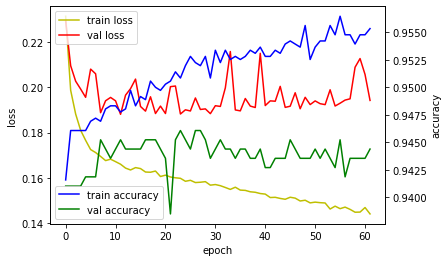

In [157]:
#  기존과 비교
draw_loss(hist_early)

학습을 더 적게 했기 때문에 patience가 50일 때보다 데이터가 불안정하다. (언더피팅)

In [158]:
loss_and_metrics_early2 = model_early2.evaluate(X_test,y_test,batch_size=32)

print('##### early stopping2 - Test Result #####')
print('loss : ',str(loss_and_metrics_early2[0]))
print('Accuracy : ',str(loss_and_metrics_early2[1]))

38/38 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9427
##### early stopping2 - Test Result #####
loss :  0.19397342205047607
Accuracy :  0.9427127242088318


In [159]:
predict_3 = model_early2.predict(X_test, batch_size=32)

print("Recall :", recall_score(y_test,predict_3.round()))

Recall : 0.2


In [160]:
print(classification_report(y_test,predict_3.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.54      0.20      0.29        70

    accuracy                           0.94      1187
   macro avg       0.75      0.59      0.63      1187
weighted avg       0.93      0.94      0.93      1187



0.7840644583706357


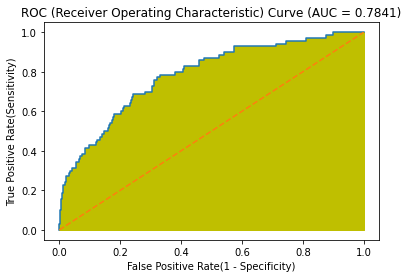

In [161]:
draw_roccurve(predict_3)

0.7755339557488171


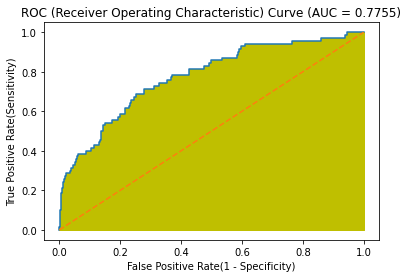

In [162]:
# 기존과 비교
draw_roccurve(predict_2)

patience를 30으로 줄이자 loss와 accuracy 는 기존보다 불안정하지만 AUC는 patience가 50일 때 보다 더 크게 나왔다.

이번에는 75로 조정하였다.

##### patience = 75

In [163]:
# patience=75인 early_stopping

np.random.seed(3)
tf.random.set_seed(3)

# early stopping 적용모델
model_early3 = models.Sequential()
model_early3  .add(Dense(42, input_dim = 84, activation='relu'))
model_early3 .add(Dense(1, activation='sigmoid'))

model_early3 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [164]:
early_stopping_callback3 = EarlyStopping(monitor='val_loss', patience=75)

hist_early3 = model_early3.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback3,checkpointer])


Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss did not improve from 0.18805

Epoch 00011: val_loss did not improve from 0.18805

Epoch 00012: val_loss did not improve from 0.18805

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not improve from 0.18805

Epoch 00015: val_loss did not improve from 0.18805

Epoch 00016: val_loss did not improve from 0.18805

Epoch 00017: val_loss did not improve from 0.18805

Epoch 00018: val_loss did not improve from 0.18805

Epoch 00019: val_loss did not improve from 0.18805

Epoch 00020

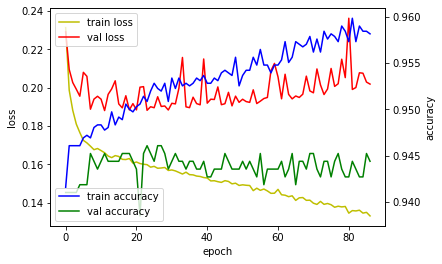

In [165]:
# 모델 학습과정 확인
draw_loss(hist_early3)

In [166]:
loss_and_metrics_early3 = model_early3.evaluate(X_test,y_test,batch_size=32)

print('##### early stopping3 - Test Result #####')
print('loss : ',str(loss_and_metrics_early3[0]))
print('Accuracy : ',str(loss_and_metrics_early3[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9444
##### early stopping3 - Test Result #####
loss :  0.20183974504470825
Accuracy :  0.9443976283073425


In [167]:
predict_4 = model_early3.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_4.round()))

Recall : 0.14285714285714285


In [168]:
print(classification_report(y_test,predict_4.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.62      0.14      0.23        70

    accuracy                           0.94      1187
   macro avg       0.79      0.57      0.60      1187
weighted avg       0.93      0.94      0.93      1187



0.756759176365264


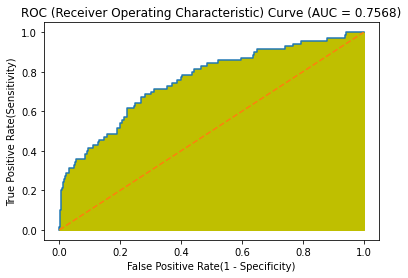

In [169]:
draw_roccurve(predict_4)

patience가 늘어날 수록 (오래 기다림) accuracy는 증가한다. 하지만 AUC는 감소한다.

비록 patience 가 30일 때가 더 AUC가 높고 우리의 성능 평가 기준은 AUC지만 어느정도 accuracy가 보장되고 언더피팅이 되지 않은 모형을 선택하려 한다. patience가 30일때와 50일때 AUC 가 크게 차이 나지 않기 때문에 

따라서, patience를 50으로 지정한다.

### 2) drop out 적용

기존값에 dropout을 적용한다. 먼저 0.5로 지정한다.

##### droupout = 0.5

In [189]:
np.random.seed(3)
tf.random.set_seed(3)

# dropout 적용모델
model_drop5 = models.Sequential()
model_drop5 .add(Dense(42, input_dim = 84, activation='relu'))
model_drop5.add(Dropout(0.5))
model_drop5 .add(Dense(1, activation='sigmoid'))

model_drop5 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])


In [190]:
hist_drop5 = model_drop5.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss did not improve from 0.18805

Epoch 00011: val_loss did not improve from 0.18805

Epoch 00012: val_loss did not improve from 0.18805

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not improve from 0.18805

Epoch 00015: val_loss did not improve from 0.18805

Epoch 00016: val_loss did not improve from 0.18805

Epoch 00017: val_loss did not improve from 0.18805

Epoch 00018: val_loss did not improve from 0.18805

Epoch 00019: val_loss did not improve from 0.18805

Epoch 00020

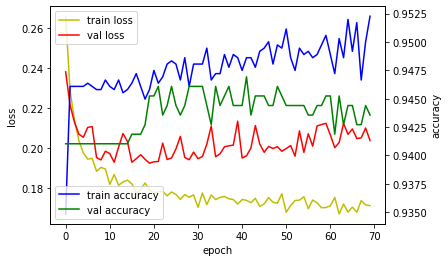

In [191]:
# 모델 학습과정 확인
draw_loss(hist_drop5)

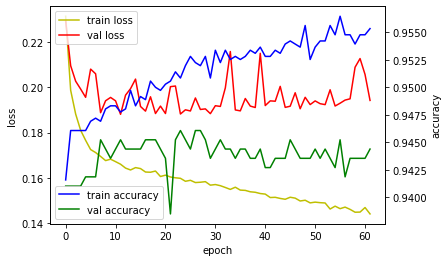

In [192]:
# 기존 모델과 비교
draw_loss(hist_early)

drop out=0.5 를 적용했을 때보다 적용하지 않은 것이 더 좋은 결과가 나온다.

In [193]:
loss_and_metrics_drop5 = model_drop5.evaluate(X_test,y_test,batch_size=32)

print('##### Dropout 0.5- Test Result #####')
print('loss : ',str(loss_and_metrics_drop5[0]))
print('Accuracy : ',str(loss_and_metrics_drop5[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9436
##### Dropout 0.5- Test Result #####
loss :  0.2036454826593399
Accuracy :  0.9435551762580872


In [194]:
predict_9 = model_drop5.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_9.round()))

Recall : 0.08571428571428572


In [195]:
print(classification_report(y_test,predict_9.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      1.00      0.97      1117
     suicide       0.67      0.09      0.15        70

    accuracy                           0.94      1187
   macro avg       0.81      0.54      0.56      1187
weighted avg       0.93      0.94      0.92      1187



0.7514899603529863


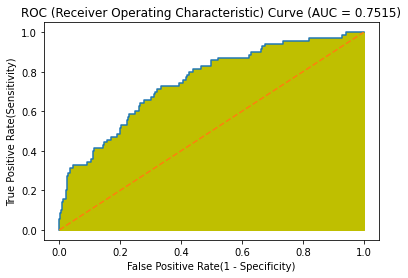

In [196]:
draw_roccurve(predict_9)

0.7755339557488171


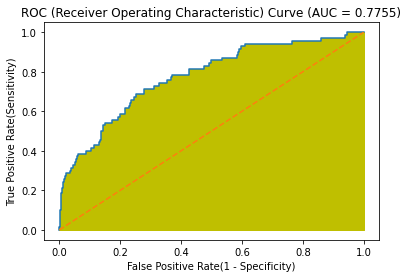

In [187]:
# 기존 모델과 비교
draw_roccurve(predict_2)

##### droupout = 0.75

이번에는 dropout을 0.75로 지정하였다.

In [197]:
np.random.seed(3)
tf.random.set_seed(3)

# dropout 적용모델
model_drop75 = models.Sequential()
model_drop75 .add(Dense(42, input_dim = 84, activation='relu'))
model_drop75.add(Dropout(0.75))
model_drop75 .add(Dense(1, activation='sigmoid'))

model_drop75.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])


In [198]:
hist_drop75 = model_drop75.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss did not improve from 0.18805

Epoch 00011: val_loss did not improve from 0.18805

Epoch 00012: val_loss did not improve from 0.18805

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not improve from 0.18805

Epoch 00015: val_loss did not improve from 0.18805

Epoch 00016: val_loss did not improve from 0.18805

Epoch 00017: val_loss did not improve from 0.18805

Epoch 00018: val_loss did not improve from 0.18805

Epoch 00019: val_loss did not improve from 0.18805

Epoch 00020

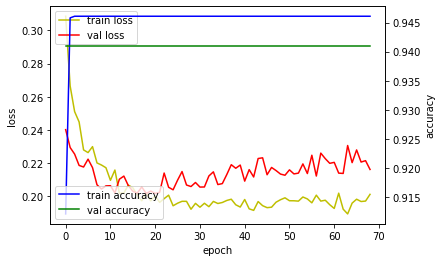

In [199]:
# 모델 학습과정 확인
draw_loss(hist_drop75)

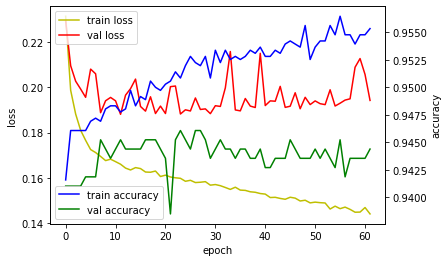

In [200]:
# 기존과 비교
draw_loss(hist_early)

droupout = 0.75로 잡을 경우 5회 미만으로 학습해도 accuracy가 보장되며 그 이후의 accuracy는 거의 변화가 없다.

In [201]:
loss_and_metrics_drop75 = model_drop75.evaluate(X_test,y_test,batch_size=32)

print('##### Dropout 0.75 - Test Result #####')
print('loss : ',str(loss_and_metrics_drop75[0]))
print('Accuracy : ',str(loss_and_metrics_drop75[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9410
##### Dropout 0.75 - Test Result #####
loss :  0.21610106527805328
Accuracy :  0.941027820110321


In [203]:
predict_10 = model_drop75.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_10.round()))

Recall : 0.0


In [204]:
print(classification_report(y_test,predict_10.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.94      1.00      0.97      1117
     suicide       0.00      0.00      0.00        70

    accuracy                           0.94      1187
   macro avg       0.47      0.50      0.48      1187
weighted avg       0.89      0.94      0.91      1187



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7182695996930554


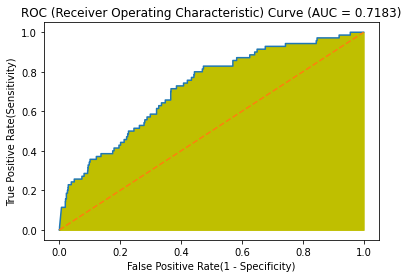

In [205]:
draw_roccurve(predict_10)

##### droupout = 0.25

이번에는 dropout을 0.25로 조정한다.

In [206]:
np.random.seed(3)
tf.random.set_seed(3)

# droupout 적용모델
model_drop25 = models.Sequential()
model_drop25 .add(Dense(42, input_dim = 84, activation='relu'))
model_drop25.add(Dropout(0.25))
model_drop25 .add(Dense(1, activation='sigmoid'))

model_drop25 .compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])


In [207]:
hist_drop25= model_drop25.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss did not improve from 0.18805

Epoch 00011: val_loss did not improve from 0.18805

Epoch 00012: val_loss did not improve from 0.18805

Epoch 00013: val_loss did not improve from 0.18805

Epoch 00014: val_loss did not improve from 0.18805

Epoch 00015: val_loss did not improve from 0.18805

Epoch 00016: val_loss did not improve from 0.18805

Epoch 00017: val_loss did not improve from 0.18805

Epoch 00018: val_loss did not improve from 0.18805

Epoch 00019: val_loss did not improve from 0.18805

Epoch 00020

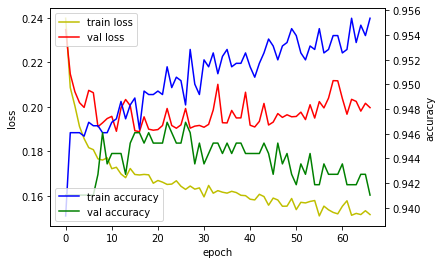

In [208]:
# 모델 학습과정 확인
draw_loss(hist_drop25)

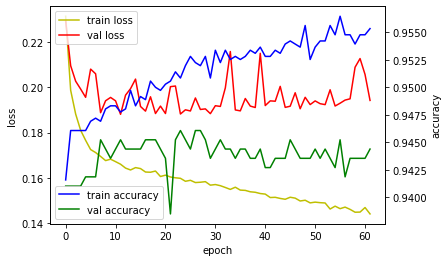

In [209]:
# 기존과 비교
draw_loss(hist_early)

droupout을 적용하지 않은 것보다 안정성은 조금더 확보되지만 loss 자체는 증가한다.

In [210]:
loss_and_metrics_drop25 = model_drop25.evaluate(X_test,y_test,batch_size=32)

print('##### Dropout 0.25 - Test Result #####')
print('loss : ',str(loss_and_metrics_drop25[0]))
print('Accuracy : ',str(loss_and_metrics_drop25[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9410
##### Dropout 0.25 - Test Result #####
loss :  0.19965608417987823
Accuracy :  0.941027820110321


In [211]:
predict_11 = model_drop25.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_11.round()))

Recall : 0.11428571428571428


In [212]:
print(classification_report(y_test,predict_11.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.50      0.11      0.19        70

    accuracy                           0.94      1187
   macro avg       0.72      0.55      0.58      1187
weighted avg       0.92      0.94      0.92      1187



0.765941936308991


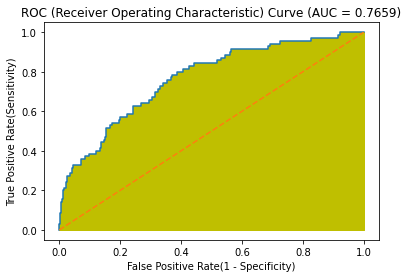

In [213]:
draw_roccurve(predict_11)

0.7755339557488171


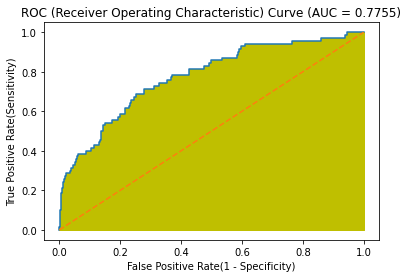

In [214]:
# 기존과 비교
draw_roccurve(predict_2)

drop out 사용시 AUC 향상은 없다.

**따라서 droupout을 적용하지 않은 모델을 사용한다.**


### 3) optimizer 변경

기존에는 optimizer가 RMSProb 였다.

여기에 '누적학습률 중에서도 바로 직전이 가장 중요하다' 는 개념을 포함한 Adam으로 optimizer 를 변경하겠다.

#### Adam

In [216]:
np.random.seed(3)
tf.random.set_seed(3)

# Adam 적용모델
model_adam = models.Sequential()
model_adam .add(Dense(42, input_dim = 84, activation='relu'))
model_adam .add(Dense(1, activation='sigmoid'))

model_adam .compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [217]:
hist_adam = model_adam.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18805

Epoch 00002: val_loss did not improve from 0.18805

Epoch 00003: val_loss did not improve from 0.18805

Epoch 00004: val_loss did not improve from 0.18805

Epoch 00005: val_loss did not improve from 0.18805

Epoch 00006: val_loss did not improve from 0.18805

Epoch 00007: val_loss did not improve from 0.18805

Epoch 00008: val_loss did not improve from 0.18805

Epoch 00009: val_loss did not improve from 0.18805

Epoch 00010: val_loss improved from 0.18805 to 0.18761, saving model to ./DNN/10-0.1876.hdf5

Epoch 00011: val_loss did not improve from 0.18761

Epoch 00012: val_loss did not improve from 0.18761

Epoch 00013: val_loss did not improve from 0.18761

Epoch 00014: val_loss did not improve from 0.18761

Epoch 00015: val_loss improved from 0.18761 to 0.18723, saving model to ./DNN/15-0.1872.hdf5

Epoch 00016: val_loss did not improve from 0.18723

Epoch 00017: val_loss improved from 0.18723 to 0.18706, saving model to ./DNN/17-0.

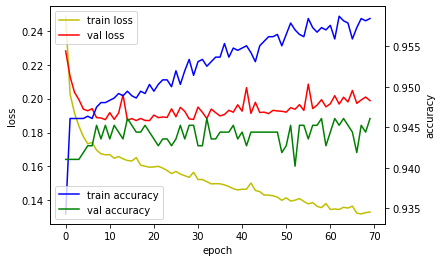

In [218]:
# 모델 학습과정 확인
draw_loss(hist_adam)

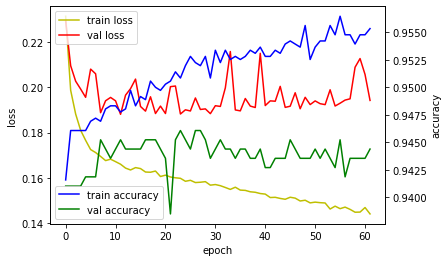

In [219]:
# 기존과 비교
draw_loss(hist_early)

기존보다 조금 더 모델이 안정적이다.

In [220]:
loss_and_metrics_adam = model_adam.evaluate(X_test,y_test,batch_size=32)

print('##### Adam - Test Result #####')
print('loss : ',str(loss_and_metrics_adam[0]))
print('Accuracy : ',str(loss_and_metrics_adam[1]))

38/38 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9461
##### Adam - Test Result #####
loss :  0.19883538782596588
Accuracy :  0.9460825324058533


In [221]:
predict_12 = model_adam.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_12.round()))

Recall : 0.12857142857142856


In [222]:
print(classification_report(y_test,predict_12.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      1.00      0.97      1117
     suicide       0.75      0.13      0.22        70

    accuracy                           0.95      1187
   macro avg       0.85      0.56      0.60      1187
weighted avg       0.94      0.95      0.93      1187



0.7633456963806113


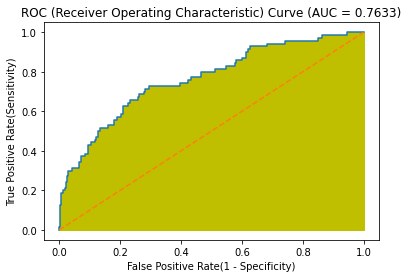

In [223]:
draw_roccurve(predict_12)

0.7755339557488171


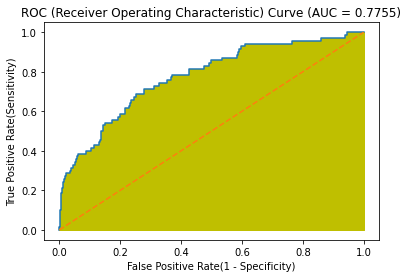

In [224]:
# 기존과 비교
draw_roccurve(predict_2)

Adam 보다 기존처럼 RMSprob를 사용하는 것이 더 좋은 것으로 확인된다.

#### Adadelta

In [225]:
np.random.seed(3)
tf.random.set_seed(3)

# Adadelta 적용모델
model_adadelta = models.Sequential()
model_adadelta .add(Dense(42, input_dim = 84, activation='relu'))
model_adadelta .add(Dense(1, activation='sigmoid'))

model_adadelta .compile(optimizer=Adadelta(),loss='binary_crossentropy',metrics=['accuracy'])

In [226]:
hist_adadelta = model_adadelta.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val))

Epoch 1/300
112/112 [==============================] - 1s 4ms/step - loss: 0.7161 - accuracy: 0.4063 - val_loss: 0.7095 - val_accuracy: 0.4313
Epoch 2/300
112/112 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.4445 - val_loss: 0.6981 - val_accuracy: 0.4693
Epoch 3/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4841 - val_loss: 0.6862 - val_accuracy: 0.5038
Epoch 4/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5310 - val_loss: 0.6737 - val_accuracy: 0.5468
Epoch 5/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5779 - val_loss: 0.6609 - val_accuracy: 0.5998
Epoch 6/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6229 - val_loss: 0.6479 - val_accuracy: 0.6521
Epoch 7/300
112/112 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6779 - val_loss: 0.6347 - val_accuracy: 0.7085

adadelta 시 loss가 끊임없이 감소한다. 따라서 early stopping이 적용되지 않는다.

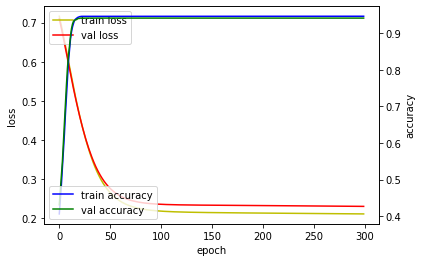

In [227]:
# 모델 학습과정 확인
draw_loss(hist_adadelta)

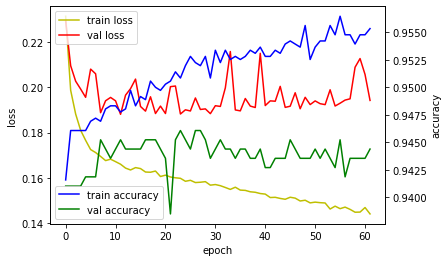

In [228]:
# 기존과 비교
draw_loss(hist_early)

기존과 비교해서 그래프가 안정적으로 변하였으며 loss는 감소, accuracy는 증가하는 형태는 보인다.

In [229]:
loss_and_metrics_adadelta = model_adadelta.evaluate(X_test,y_test,batch_size=32)

print('##### Adadelta - Test Result #####')
print('loss : ',str(loss_and_metrics_adadelta[0]))
print('Accuracy : ',str(loss_and_metrics_adadelta[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9410
##### Adadelta - Test Result #####
loss :  0.23037365078926086
Accuracy :  0.941027820110321


In [230]:
predict_13 = model_sam.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_13.round()))

Recall : 1.0


In [231]:
print(classification_report(y_test,predict_13.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.00      0.00      0.00      1117
     suicide       0.06      1.00      0.11        70

    accuracy                           0.06      1187
   macro avg       0.03      0.50      0.06      1187
weighted avg       0.00      0.06      0.01      1187



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.35100396470136846


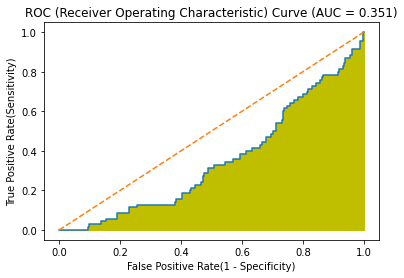

In [232]:
draw_roccurve(predict_13)

0.7755339557488171


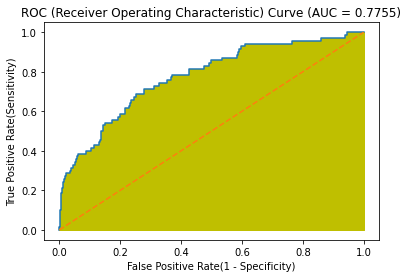

In [233]:
# 기존과 비교
draw_roccurve(predict_2)

Adadelta 사용시 우연보다도 안좋은 있으나 없으나 한 모델이 만들어진 것이 확인된다. (기준:  AUC <0.5)

#### Adamax

In [243]:
np.random.seed(3)
tf.random.set_seed(3)

# Adamax 적용모델
model_adamax = models.Sequential()
model_adamax .add(Dense(42, input_dim = 84, activation='relu'))
model_adamax .add(Dense(1, activation='sigmoid'))

model_adamax .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [244]:
hist_adamax = model_adamax.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

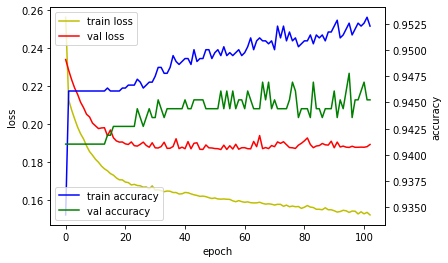

In [245]:
# 모델 학습과정 확인
draw_loss(hist_adamax)

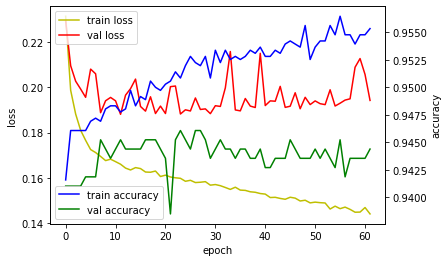

In [246]:
# 기존과 비교
draw_loss(hist_early)

In [247]:
loss_and_metrics_adamax = model_adamax.evaluate(X_test,y_test,batch_size=32)

print('##### Adamax - Test Result #####')
print('loss : ',str(loss_and_metrics_adamax[0]))
print('Accuracy : ',str(loss_and_metrics_adamax[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9452
##### Adamax - Test Result #####
loss :  0.1891523003578186
Accuracy :  0.9452400803565979


In [248]:
predict_14 = model_adamax.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_14.round()))

Recall : 0.15714285714285714


In [249]:
print(classification_report(y_test,predict_14.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.65      0.16      0.25        70

    accuracy                           0.95      1187
   macro avg       0.80      0.58      0.61      1187
weighted avg       0.93      0.95      0.93      1187



0.7858038112290574


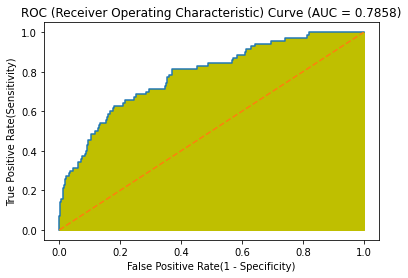

In [250]:
draw_roccurve(predict_14)

0.7755339557488171


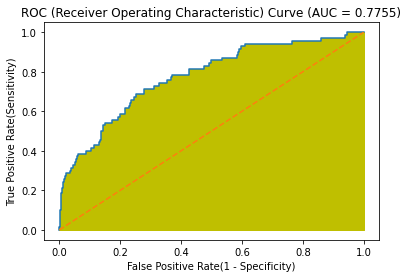

In [251]:
# 기존과 비교
draw_roccurve(predict_2)

RMSprob를 쓸 때 보다 Adamax를 쓸 때의 AUC가 더 좋은 것으로 확인된다. 

따라서 optimizer를 Adamax로 바꿔준다.

#### Nadam

In [252]:
np.random.seed(3)
tf.random.set_seed(3)

# Nadam 적용모델
model_nadam = models.Sequential()
model_nadam .add(Dense(42, input_dim = 84, activation='relu'))
model_nadam .add(Dense(1, activation='sigmoid'))

model_nadam .compile(optimizer=Nadam(),loss='binary_crossentropy',metrics=['accuracy'])

In [253]:
hist_nadam = model_nadam.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

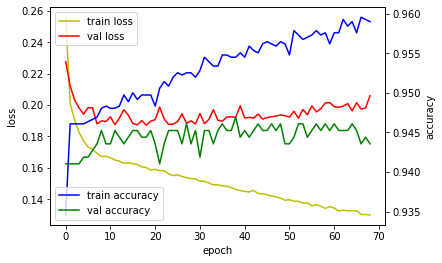

In [254]:
# 모델 학습과정 확인
draw_loss(hist_nadam)

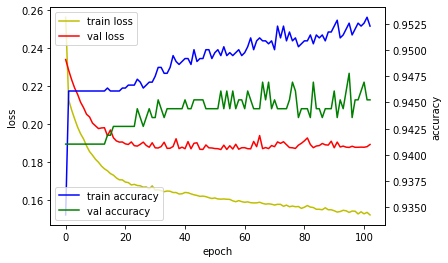

In [255]:
# 기존과 비교
draw_loss(hist_adamax)

In [256]:
loss_and_metrics_nadam = model_nadam.evaluate(X_test,y_test,batch_size=32)

print('##### NADAM - Test Result #####')
print('loss : ',str(loss_and_metrics_nadam[0]))
print('Accuracy : ',str(loss_and_metrics_nadam[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2059 - accuracy: 0.9436
##### NADAM - Test Result #####
loss :  0.20594242215156555
Accuracy :  0.9435551762580872


In [257]:
predict_15 = model_nadam.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_15.round()))

Recall : 0.12857142857142856


In [258]:
print(classification_report(y_test,predict_15.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.60      0.13      0.21        70

    accuracy                           0.94      1187
   macro avg       0.77      0.56      0.59      1187
weighted avg       0.93      0.94      0.93      1187



0.7671952935157949


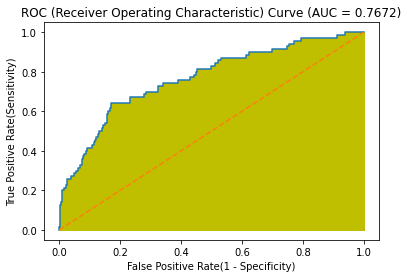

In [259]:
draw_roccurve(predict_15)

0.7858038112290574


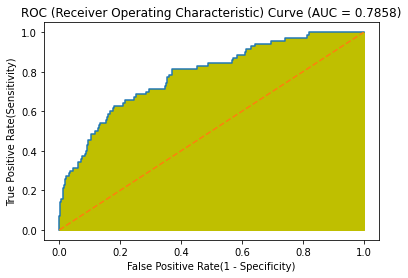

In [260]:
# 기존과 비교
draw_roccurve(predict_14)

**따라서 optimizer를 RMSprob에서 Adamax 를 사용한다.**

### 4) 규제 사용

기존 히든레이어 1개, 히든 노드 42개, optimizer = Adamax, early_stopping 모델에 규제를 적용하겠다.

#### L2규제 사용

일단 L2규제를 사용한다. 파라미터는 0.01로 지정한다.

In [261]:
np.random.seed(3)
tf.random.set_seed(3)

from keras import regularizers

# L2규제 적용 적용모델
model_l2 = models.Sequential()
model_l2 .add(Dense(42, input_dim = 84,activation='relu',
                     kernel_regularizer=regularizers.l2(0.01),
                     activity_regularizer=regularizers.l1(0.01)))
model_l2 .add(Dense(1, activation='sigmoid'))

model_l2 .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [262]:
hist_l2 = model_l2 .fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

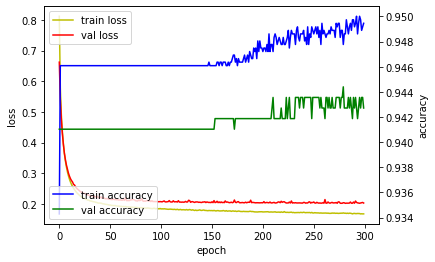

In [263]:
# 모델 학습과정 확인
draw_loss(hist_l2)

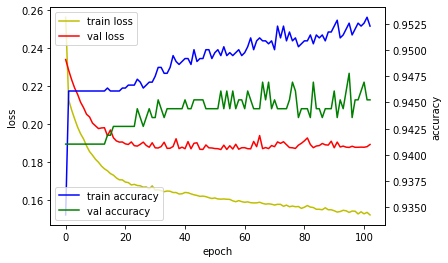

In [264]:
# 기존과 비교
draw_loss(hist_adamax)

In [265]:
loss_and_metrics_l2 = model_l2.evaluate(X_test,y_test,batch_size=32)

print('##### L2 규제- Test Result #####')
print('loss : ',str(loss_and_metrics_l2[0]))
print('Accuracy : ',str(loss_and_metrics_l2[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9427
##### L2 규제- Test Result #####
loss :  0.20301224291324615
Accuracy :  0.9427127242088318


In [266]:
predict_16 = model_l2.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_16.round()))

Recall : 0.04285714285714286


In [267]:
print(classification_report(y_test,predict_16.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.94      1.00      0.97      1117
     suicide       0.75      0.04      0.08        70

    accuracy                           0.94      1187
   macro avg       0.85      0.52      0.53      1187
weighted avg       0.93      0.94      0.92      1187



0.7857142857142857


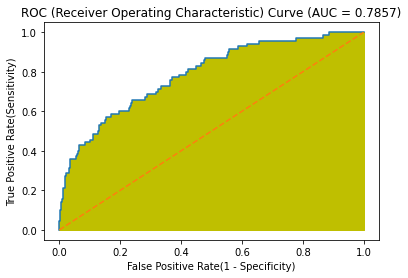

In [268]:
draw_roccurve(predict_16)

0.7858038112290574


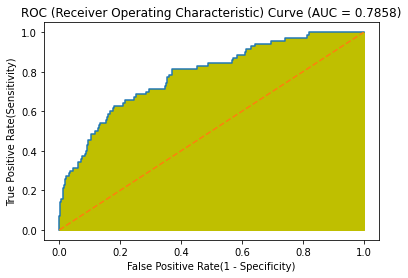

In [269]:
# 기존과 비교
draw_roccurve(predict_14)

릿지항 적용 전과 후에 AUC에 큰 차이가 없다.
그런데 L2 규제항을 적용하자 accuracy에 거의 변화가 없는 형태가 나왔다. 또한 현재 L2 규제항을 적용하지 않은 모형이 지나치게 과적합 상태라고 보기 어렵다.

따라서, L1회귀를 적용하거나 파라미터를 변경하는 일 없이 그냥 규제를 적용하지 않은 모형을 사용한다.

### 5) 클래스 가중치 부여

가중치는 흔히 사용하는 공식에 맞춰 사용한다.

In [274]:
weight_for_1 = (1 / 324) * (5935 / 2.0)
weight_for_0 = (1 / 5611) * (5935 / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.16


In [275]:
np.random.seed(3)
tf.random.set_seed(3)

# 가중치 추가 모델
model_weight = models.Sequential()
model_weight .add(Dense(42, input_dim = 84, activation='relu'))
model_weight .add(Dense(1, activation='sigmoid'))

model_weight.compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [276]:
hist_weight = model_weight.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer],
                 class_weight=class_weight)


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

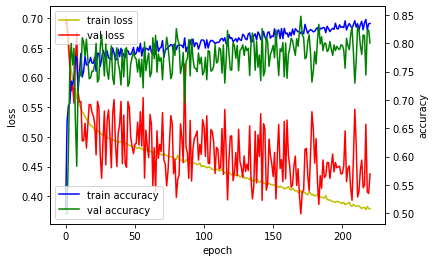

In [279]:
# 모델 학습과정 확인
draw_loss(hist_weight)

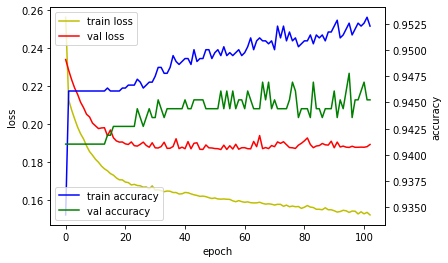

In [280]:
# 기존과 비교
draw_loss(hist_adamax)

클래스 별 가중치가 부여되자 과적합 상태로 바뀌었고 accuracy가 감소하였다.

In [282]:
loss_and_metrics_weight= model_weight.evaluate(X_test,y_test,batch_size=32)

print('##### class weight - Test Result #####')
print('loss : ',str(loss_and_metrics_weight[0]))
print('Accuracy : ',str(loss_and_metrics_weight[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8003
##### class weight - Test Result #####
loss :  0.43755701184272766
Accuracy :  0.8003369569778442


In [283]:
predict_22 = model_weight.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_22.round()))

Recall : 0.5571428571428572


In [284]:
print(classification_report(y_test,predict_22.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.97      0.82      0.88      1117
     suicide       0.16      0.56      0.25        70

    accuracy                           0.80      1187
   macro avg       0.56      0.69      0.57      1187
weighted avg       0.92      0.80      0.85      1187



0.7643944238393657


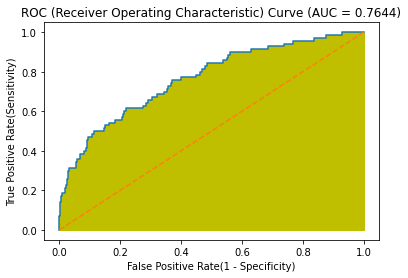

In [285]:
draw_roccurve(predict_22)

0.7858038112290574


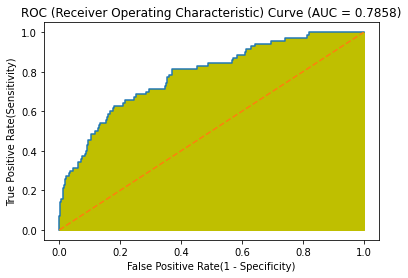

In [75]:
# 기존과 비교
draw_roccurve(predict_14)

오히려 가중치를 부여할 때 보다 성능이 더 좋지 않게 나온다. 특히 accuracy가 지나치게 감소해서 사용하기에 어렵다.

### 6) bias 추가

불균형 데이터의 비율이 bias가 되어 모형을 생성한다.

In [286]:
initial_bias =np.log([5611/324])
print("초기 bias는", initial_bias)

초기 bias는 [2.85174072]


In [287]:
output_bias = tf.keras.initializers.Constant(initial_bias)

In [288]:
np.random.seed(3)
tf.random.set_seed(3)

# bias 추가 모델
model_bias = models.Sequential()
model_bias .add(Dense(42, input_dim = 84, activation='relu'))
model_bias .add(Dense(1, activation='sigmoid', bias_initializer=output_bias))

model_bias .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [289]:
hist_bias = model_bias.fit(X_train, y_train,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

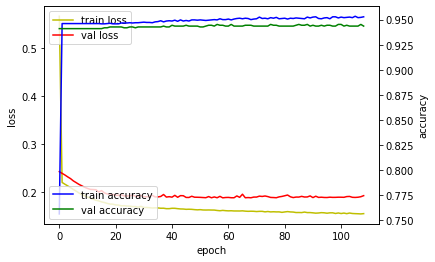

In [290]:
# 모델 학습과정 확인
draw_loss(hist_bias)

한 두번 학습했는데도 불구하고 정확도가 굉장히 높아졌다. 또한 이후 학습을 했을 때 accuracy가 더 이상 높아지지 않는다.

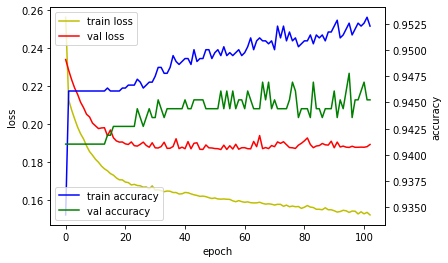

In [291]:
# 기존과 비교
draw_loss(hist_adamax)

In [292]:
loss_and_metrics_bias = model_bias.evaluate(X_test,y_test,batch_size=32)

print('##### bias - Test Result #####')
print('loss : ',str(loss_and_metrics_bias[0]))
print('Accuracy : ',str(loss_and_metrics_bias[1]))

38/38 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9436
##### bias - Test Result #####
loss :  0.19186702370643616
Accuracy :  0.9435551762580872


In [293]:
predict_23 = model_bias.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_23.round()))

Recall : 0.07142857142857142


In [294]:
print(classification_report(y_test,predict_23.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.94      1.00      0.97      1117
     suicide       0.71      0.07      0.13        70

    accuracy                           0.94      1187
   macro avg       0.83      0.53      0.55      1187
weighted avg       0.93      0.94      0.92      1187



0.7864944366287249


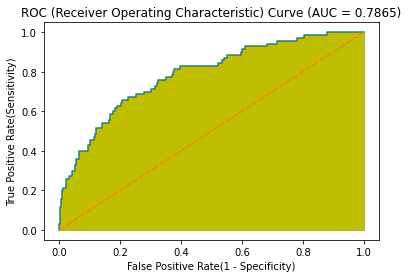

In [295]:
draw_roccurve(predict_23)

0.7858038112290574


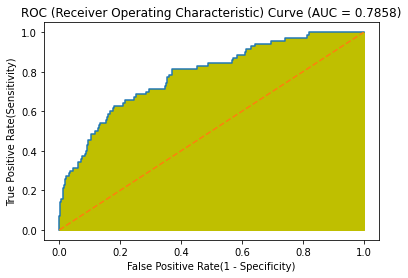

In [296]:
# 기존과 비교
draw_roccurve(predict_14)

bias를 추가했을 때 AUC가 조금 높아지기는 하지만 큰 변화는 없다. 하지만 accuracy가 학습과 관계없이 지나치게 일정한 모습을 보인다. 따라서 그냥 bias가 없는 모형을 사용한다.

### 6) 불균형 데이터 처리

#### SMOTE

모델을 확정하였고 추가로 데이터가 많이 불균형하니 SMOTE를 적용해보겠다. 가짜 데이터를 만드는 것이므로 실무에서 사용 가능 여부에 대한 논란이 있다. 일단 적용한 후 결과를 살펴보겠다.

In [297]:
from sklearn.utils import resample
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [298]:
print("Before SMOTE: ",Counter(y_train))

Before SMOTE:  Counter({0.0: 3369, 1.0: 192})


기존에는 자살예측자 비율이 전체의 0.06 % 인 불균형 데이터였다. 

In [299]:
np.random.seed(3)
tf.random.set_seed(3)

sm = SMOTE()
X_train_sam, y_train_sam = sm.fit_resample(X_train, y_train)

In [300]:
print("After SMOTE: ",Counter(y_train_sam))

After SMOTE:  Counter({0.0: 3369, 1.0: 3369})


이후에는 5:5 비율의 균형 데이터로 변하였다.

In [301]:
np.random.seed(3)
tf.random.set_seed(3)

# SMOTE 적용모델
model_sam = models.Sequential()
model_sam .add(Dense(42, input_dim = 84, activation='relu'))
model_sam .add(Dense(1, activation='sigmoid'))

model_sam .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [302]:
hist_sam = model_sam.fit(X_train_sam, y_train_sam,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

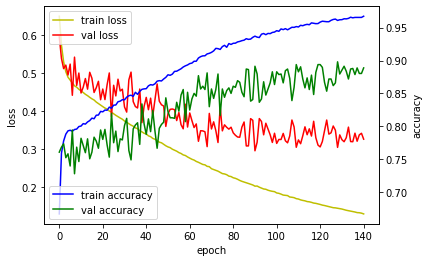

In [303]:
# 모델 학습과정 확인
draw_loss(hist_sam)

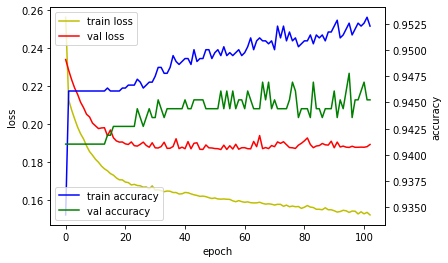

In [308]:
# 기존과 비교
draw_loss(hist_adamax)

SMOTE를 사용한 모형은 학습할 수록 accuracy 변화가 서서히 주는 일정한 경향을 보이지만 전체적인 accuracy가 기존에 비해 감소하였다.

In [309]:
loss_and_metrics_SMOTE = model_sam.evaluate(X_test,y_test,batch_size=32)

print('##### SMOTE - Test Result #####')
print('loss : ',str(loss_and_metrics_SMOTE[0]))
print('Accuracy : ',str(loss_and_metrics_SMOTE[1]))

38/38 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8888
##### SMOTE - Test Result #####
loss :  0.3266420364379883
Accuracy :  0.8887952566146851


In [310]:
predict_17= model_sam.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_17.round()))

Recall : 0.35714285714285715


In [311]:
print(classification_report(y_test,predict_17.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.96      0.92      0.94      1117
     suicide       0.22      0.36      0.27        70

    accuracy                           0.89      1187
   macro avg       0.59      0.64      0.61      1187
weighted avg       0.91      0.89      0.90      1187



0.7177132625655455


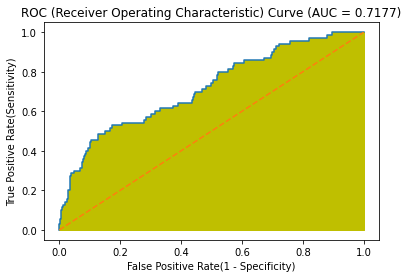

In [312]:
draw_roccurve(predict_17)

SMOTE를 적용한 결과 오히려 ACU와 accuracy 가 떨어졌다.

또한 SMOTE는 실무에서 적용할 때 논란이 있기에 SMOTE를 적용하지 않은 모형을 사용한다.

#### 언더 샘플링

이번에는 TR에 언더 샘플링을 적용해보겠다. 

In [313]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [314]:
np.random.seed(3)
tf.random.set_seed(3)

print("Before undersampling: ", Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({0.0: 3369, 1.0: 192})
After undersampling:  Counter({0.0: 192, 1.0: 192})


{0 : 자살 위험군 아님} 인 데이터의 수가 192로 줄어든다.

In [315]:
np.random.seed(3)
tf.random.set_seed(3)

# 언더샘플링 적용모델
model_under = models.Sequential()
model_under .add(Dense(42, input_dim = 84, activation='relu'))
model_under .add(Dense(1, activation='sigmoid'))

model_under .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [316]:
hist_under = model_under.fit(X_train_under, y_train_under,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

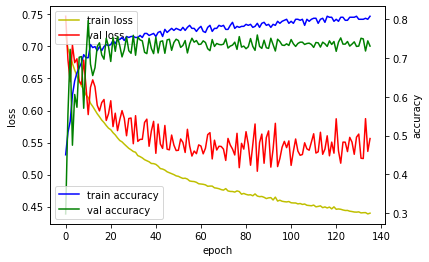

In [317]:
# 모델 학습과정 확인
draw_loss(hist_under)

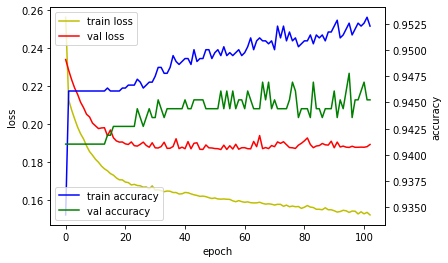

In [318]:
# 기존과 비교
draw_loss(hist_adamax)

마찬가지로 단순 언더샘플링을 사용한 모형은 학습할 수록 accuracy 변화가 서서히 주는 일정한 경향을 보이지만 전체적인 accuracy가 기존에 비해 감소하였다.

In [319]:
loss_and_metrics_under = model_under.evaluate(X_test,y_test,batch_size=32)

print('##### Under fitting - Test Result #####')
print('loss : ',str(loss_and_metrics_under[0]))
print('Accuracy : ',str(loss_and_metrics_under[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7304
##### Under fitting - Test Result #####
loss :  0.5561898350715637
Accuracy :  0.7304127812385559


In [320]:
predict_18 = model_under.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_18.round()))

Recall : 0.6714285714285714


In [321]:
print(classification_report(y_test,predict_18.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.97      0.73      0.84      1117
     suicide       0.14      0.67      0.23        70

    accuracy                           0.73      1187
   macro avg       0.55      0.70      0.53      1187
weighted avg       0.92      0.73      0.80      1187



0.7737178667348765


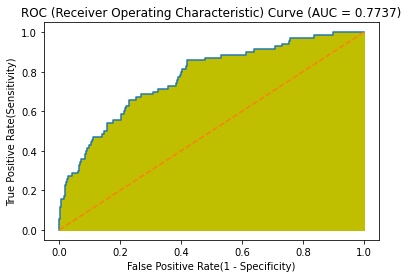

In [322]:
draw_roccurve(predict_18)

데이터가 불균형하고 그 수가 적어져 AUC는 비교적 크게 나왔지만 accuracy가 너무 작다. 

따라서, 언더 피팅도 사용하지 않는다.

#### ADASYN

sampling_strategy는 초모수이다. 지정한 값에 따라 0과 1의 비율을 맞출 수 있다. 

우선 0.2로 지정하였다.

In [323]:
print( 'Before ADASYN: ', Counter(y_train))

np.random.seed(3)
tf.random.set_seed(3)
ada = ADASYN(sampling_strategy=0.2, random_state=3)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

print('After ADASYN:' ,Counter(y_train_ada))

Before ADASYN:  Counter({0.0: 3369, 1.0: 192})
After ADASYN: Counter({0.0: 3369, 1.0: 672})


In [327]:
np.random.seed(3)
tf.random.set_seed(3)

# ADASYN 적용모델
model_adasyn = models.Sequential()
model_adasyn .add(Dense(42, input_dim = 84, activation='relu'))
model_adasyn.add(Dense(1, activation='sigmoid'))

model_adasyn .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [328]:
hist_adasyn= model_adasyn.fit(X_train_ada, y_train_ada,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

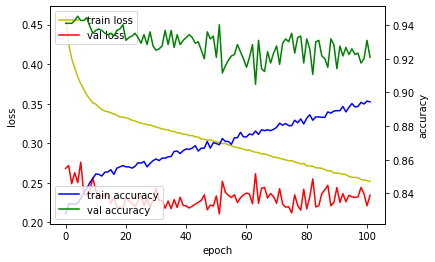

In [329]:
# 모델 학습과정 확인
draw_loss(hist_adasyn)

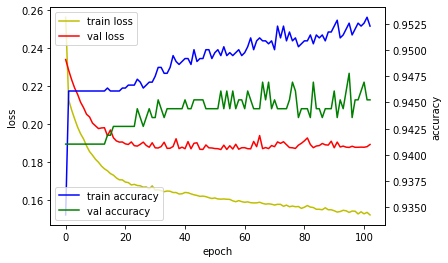

In [334]:
# 기존과 비교
draw_loss(hist_adamax)

ADASYN 사용시 신기하게도 훈련용 데이터의 성능이 검증용 데이터의 성능보다 더 좋지 않은 것으로 나온다.

In [335]:
loss_and_metrics_adasyn = model_adasyn.evaluate(X_test,y_test,batch_size=32)

print('##### ADASYN - Test Result #####')
print('loss : ',str(loss_and_metrics_adasyn[0]))
print('Accuracy : ',str(loss_and_metrics_adasyn[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9208
##### ADASYN - Test Result #####
loss :  0.23444780707359314
Accuracy :  0.920808732509613


In [336]:
predict_19= model_adasyn.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_19.round()))

Recall : 0.2857142857142857


In [337]:
print(classification_report(y_test,predict_19.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.96      0.96      0.96      1117
     suicide       0.31      0.29      0.30        70

    accuracy                           0.92      1187
   macro avg       0.63      0.62      0.63      1187
weighted avg       0.92      0.92      0.92      1187



0.7420386238649443


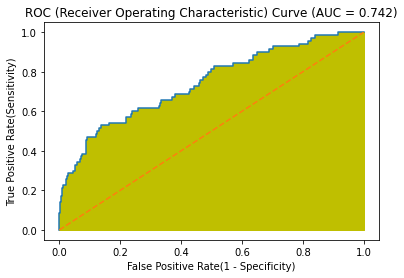

In [338]:
draw_roccurve(predict_19)

ADASYN 미적용한 것에 비해 AUC가 더 낮다.

샘플 비율을 0.1로 조정해보겠다.

In [339]:
print( 'Before ADASYN: ', Counter(y_train))

np.random.seed(3)
tf.random.set_seed(3)
ada2 = ADASYN(sampling_strategy=0.1, random_state=3)
X_train_ada2, y_train_ada2 = ada2.fit_resample(X_train, y_train)

print('After ADASYN:' ,Counter(y_train_ada2))

Before ADASYN:  Counter({0.0: 3369, 1.0: 192})
After ADASYN: Counter({0.0: 3369, 1.0: 378})


In [340]:
np.random.seed(3)
tf.random.set_seed(3)

# ADASYN 적용모델 2
model_ada2 = models.Sequential()
model_ada2 .add(Dense(42, input_dim = 84, activation='relu'))
model_ada2 .add(Dense(1, activation='sigmoid'))

model_ada2 .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [341]:
hist_ada2 = model_ada2.fit(X_train_ada2, y_train_ada2,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

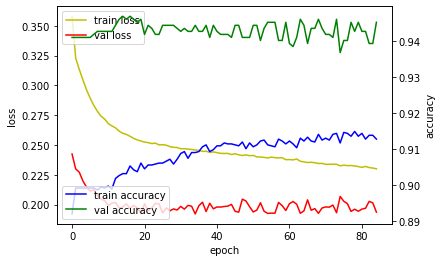

In [342]:
# 모델 학습과정 확인
draw_loss(hist_ada2)

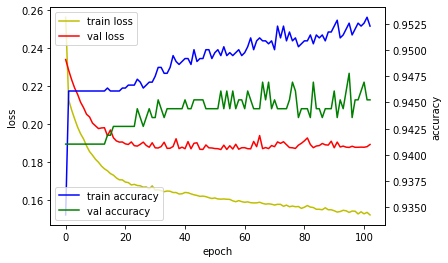

In [348]:
# 기존과 비교
draw_loss(hist_adamax)

In [343]:
loss_and_metrics_ada2 = model_ada2.evaluate(X_test,y_test,batch_size=32)

print('##### ADASYN2 - Test Result #####')
print('loss : ',str(loss_and_metrics_ada2[0]))
print('Accuracy : ',str(loss_and_metrics_ada2[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9452
##### ADASYN2 - Test Result #####
loss :  0.19363795220851898
Accuracy :  0.9452400803565979


In [344]:
predict_20 = model_ada2.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_20.round()))

Recall : 0.15714285714285714


In [345]:
print(classification_report(y_test,predict_20.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.65      0.16      0.25        70

    accuracy                           0.95      1187
   macro avg       0.80      0.58      0.61      1187
weighted avg       0.93      0.95      0.93      1187



0.774894487786162


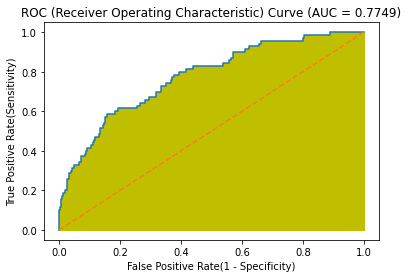

In [346]:
draw_roccurve(predict_20)

0.2 일때보다 accuracy와 AUC가 모두 크게 나왔지만 0.2일때와 마찬가지로 기존에 ADASYN을 적용하지 않은 모델보다 AUC 가 더 작게 나온다.

초기에 확정한 model_early을 가지고 불균형 데이터 처리 기법를 적용했을 때 큰 AUC 향상이 없다. 

따라서 불균형 데이터 처리 기법을 적용하지 않은 모형을 사용한다.

#### 단순 오버 샘플링


In [349]:
from imblearn.over_sampling import RandomOverSampler

In [350]:
np.random.seed(3)
tf.random.set_seed(3)

print("Before oversampling: ", Counter(y_train))

oversample = RandomOverSampler()
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

print("After undersampling: ", Counter(y_train_over))

Before oversampling:  Counter({0.0: 3369, 1.0: 192})
After undersampling:  Counter({0.0: 3369, 1.0: 3369})


In [351]:
np.random.seed(3)
tf.random.set_seed(3)

# early stopping 적용모델
model_over = models.Sequential()
model_over .add(Dense(42, input_dim = 84, activation='relu'))
model_over .add(Dense(1, activation='sigmoid'))

model_over .compile(optimizer=Adamax(),loss='binary_crossentropy',metrics=['accuracy'])

In [352]:
hist_over = model_over.fit(X_train_over, y_train_over,
                 epochs = 300, batch_size = 32, 
                 validation_data = (X_val, y_val),
                 verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss did not improve from 0.18649

Epoch 00002: val_loss did not improve from 0.18649

Epoch 00003: val_loss did not improve from 0.18649

Epoch 00004: val_loss did not improve from 0.18649

Epoch 00005: val_loss did not improve from 0.18649

Epoch 00006: val_loss did not improve from 0.18649

Epoch 00007: val_loss did not improve from 0.18649

Epoch 00008: val_loss did not improve from 0.18649

Epoch 00009: val_loss did not improve from 0.18649

Epoch 00010: val_loss did not improve from 0.18649

Epoch 00011: val_loss did not improve from 0.18649

Epoch 00012: val_loss did not improve from 0.18649

Epoch 00013: val_loss did not improve from 0.18649

Epoch 00014: val_loss did not improve from 0.18649

Epoch 00015: val_loss did not improve from 0.18649

Epoch 00016: val_loss did not improve from 0.18649

Epoch 00017: val_loss did not improve from 0.18649

Epoch 00018: val_loss did not improve from 0.18649

Epoch 00019: val_loss did not improve from 0.18649

Epoch 00020

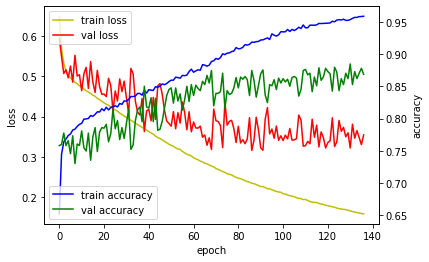

In [353]:
# 모델 학습과정 확인
draw_loss(hist_over)

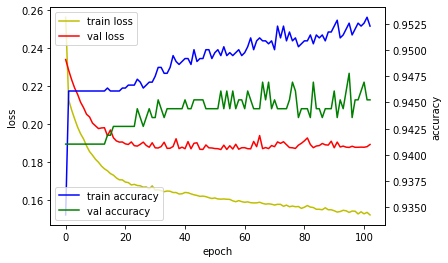

In [358]:
# 기존과 비교
draw_loss(hist_adamax)

In [354]:
loss_and_metrics_over = model_over.evaluate(X_test,y_test,batch_size=32)

print('##### oversamplig - Test Result #####')
print('loss : ',str(loss_and_metrics_over[0]))
print('Accuracy : ',str(loss_and_metrics_over[1]))

38/38 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8686
##### oversamplig - Test Result #####
loss :  0.35431304574012756
Accuracy :  0.8685762286186218


In [355]:
predict_21 = model_over.predict(X_test, batch_size=32)

from sklearn.metrics import recall_score
print("Recall :", recall_score(y_test,predict_21.round()))

Recall : 0.4142857142857143


In [356]:
print(classification_report(y_test,predict_21.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.96      0.90      0.93      1117
     suicide       0.20      0.41      0.27        70

    accuracy                           0.87      1187
   macro avg       0.58      0.66      0.60      1187
weighted avg       0.92      0.87      0.89      1187



0.7411561580764804


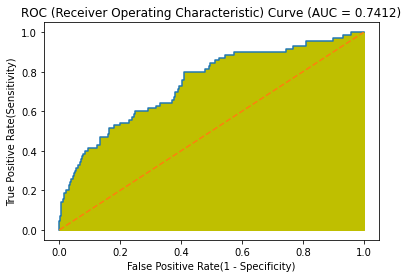

In [357]:
draw_roccurve(predict_21)

마찬가지로 단순 오버 샘플링을 적용하지 않았을 때의 성능이 더 좋다.

# 최종 모델 선택 및 성능 평가

최종적으로 히든 레이어가 1층, 히든 노드가 42개, early stopping 적용 (patience = 50), optimizer = Adamax 인 model_adamax 를 사용하였고 TS를 적용해서 나온 성능은 이러하다.

In [361]:
# confusion matrix
print(classification_report(y_test,predict_14.round(), target_names=['no_suicide', 'suicide']))

              precision    recall  f1-score   support

  no_suicide       0.95      0.99      0.97      1117
     suicide       0.65      0.16      0.25        70

    accuracy                           0.95      1187
   macro avg       0.80      0.58      0.61      1187
weighted avg       0.93      0.95      0.93      1187



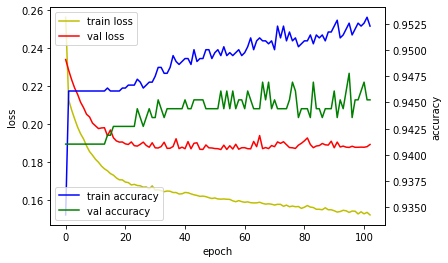

In [359]:
draw_loss(hist_adamax)

우리의 성능평가 기준인 AUC는 0.7858 이다.

0.7858038112290574


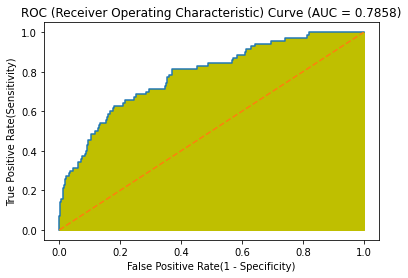

In [360]:
draw_roccurve(predict_14)

일단적으로 AUC가 0.5~0.7 이면 우수, 0.8 이상이면 매우 우수하다고 할 수 있다.

 해당 모형은 매우 우수에 가까운 모형이다.

# 추가 연구 제언

- DNN 이 아닌 불균형 데이터 분류에 우수한 성능을 보이는 RF 를 사용해서 분류하는 추가 연구를 진행해본다.
- XGboost 등 실제 실무에서 사용하는 모델을 사용해서 분류하는 추가 연구를 진행해본다.
- GAN 등 다양한 모델을 사용해서 분류를 진행해본다.
- 본 연구에서 제시된 하이퍼 파라미터에 다른 값들을 넣어서 다시 모델을 훈련시킨다.
- 모든 특성이 아닌 주요 특성만 사용해서 분류를 진행한다.